# Exp 2: Encoder Problem

### Imports

In [1]:
import gc
import pickle
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from boltzmann_machine import BoltzmannMachine

from utils import (plot_sigmoid,
                    get_encprob_env_states, 
                   get_encprob_weight_mask, 
                   gen_free_state_dist_pdf, 
                   gen_clamped_state_dist_pdf, 
                   gen_learning_plots_pdf,
                   get_boltzmann_distribution,
                   get_probs_from_counts,
                   plot_series)

## 8-3-8 Encoder

### Learning

In [2]:
grp_size = 8
num_hnodes = 3
env_states = get_encprob_env_states(grp_size)
weight_mask = get_encprob_weight_mask(grp_size, num_hnodes) # two vis grps should not interact with each other and hidden units should not interact with each other

In [ ]:
init_W = np.array([[  0., -32.,  12., -18., -16.,  22., -24., -26.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  42.,  18., -46., -34.],
       [-32.,   0., -26.,  -8., -40., -10.,  -8., -54.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  26.,  14.,  18., -44.],
       [ 12., -26.,   0.,   4.,  -2., -28., -28., -24.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., -42.,  30.,  34., -42.],
       [-18.,  -8.,   4.,   0., -26., -18., -16.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  -6., -40., -42.,  22.],
       [-16., -40.,  -2., -26.,   0., -30.,  30., -38.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  38., -44.,  22., -34.],
       [ 22., -10., -28., -18., -30.,   0.,   4., -14.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., -30., -26.,  38., -18.],
       [-24.,  -8., -28., -16.,  30.,   4.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., -42.,  34., -34., -14.],
       [-26., -54., -24.,   2., -38., -14.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  30.,  18.,  26., -58.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -42.,   4.,
        -10.,  -8.,  22., -38., -34.,  34.,  30., -42., -42.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -42.,   0., -28.,
          0., -32.,  -8., -10., -58.,  34.,  22.,  18., -54.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4., -28.,   0.,
         10.,   6., -22., -14., -28., -30.,  34.,  38., -50.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -10.,   0.,  10.,
          0., -20., -32., -22.,  14.,  -6., -44., -42.,  20.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  -8., -32.,   6.,
        -20.,   0., -26.,  18., -22.,  42., -44.,  22., -38.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  22.,  -8., -22.,
        -32., -26.,   0.,  -8.,   0., -40., -50.,  30., -10.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -38., -10., -14.,
        -22.,  18.,  -8.,   0.,  -8., -26.,  30., -34., -10.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -34., -58., -28.,
         14., -22.,   0.,  -8.,   0.,  30.,  34.,  22., -66.],
       [ 42.,  26., -42.,  -6.,  38., -30., -42.,  30.,  34.,  34., -30.,
         -6.,  42., -40., -26.,  30.,   0.,   0.,   0., -14.],
       [ 18.,  14.,  30., -40., -44., -26.,  34.,  18.,  30.,  22.,  34.,
        -44., -44., -50.,  30.,  34.,   0.,   0.,   0.,   6.],
       [-46.,  18.,  34., -42.,  22.,  38., -34.,  26., -42.,  18.,  38.,
        -42.,  22.,  30., -34.,  22.,   0.,   0.,   0.,  -2.],
       [-34., -44., -42.,  22., -34., -18., -14., -58., -42., -54., -50.,
         20., -38., -10., -10., -66., -14.,   6.,  -2.,   0.]])


bm = BoltzmannMachine(env_states, 
                      num_hnodes, 
                      weight_mask=weight_mask, 
                     #  init_W=init_W,
                      noisy_clamping=True,
                      num_noisyEnvState_per_envState=30,
                      off_bit_noise=0.02,
                      log_freq=10,
                      run_loop_count=1 # <<<<<<<<<<<<<<<<<>>>>>>>>>>>>>
                     )


bm.learn(2000)                                                         

  0%|          | 0/2000 [00:00<?, ?it/s]

[0. 0. 0.], [0. 1. 1.], [1. 0. 1.], [0. 0. 1.], [0. 1. 1.], [0. 0. 0.], [1. 1. 0.], [1. 1. 1.], [319, 10386, 10387, 10388] W_range: (0.0, 0.0)


In [4]:
print(len(bm.clamped_run_debug), len(bm.free_run_debug), len(bm.learning_debug))

# bm.clamped_run_debug = bm.clamped_run_debug[:-1]

1942 1942 1942


In [ ]:
base_dir = './838_saved_runs/xxx_30_12/'
suffix = ''
 
with open(f'{base_dir}/bm_object_free_run_debug{suffix}.pkl', 'wb') as outp:
    pickle.dump(bm.free_run_debug, outp, pickle.HIGHEST_PROTOCOL)

with open(f'{base_dir}/bm_object_clamped_run_debug{suffix}.pkl', 'wb') as outp:
    pickle.dump(bm.clamped_run_debug, outp, pickle.HIGHEST_PROTOCOL)

with open(f'{base_dir}/bm_object_learning_debug{suffix}.pkl', 'wb') as outp:
    pickle.dump(bm.learning_debug, outp, pickle.HIGHEST_PROTOCOL)

# Analysis Section

In [10]:

with open(f'{base_dir}/bm_object_free_run_debug.pkl', 'rb') as inp:
    free_run_debug = pickle.load(inp)

with open(f'{base_dir}/bm_object_clamped_run_debug.pkl', 'rb') as inp:
    clamped_run_debug = pickle.load(inp)

with open(f'{base_dir}/bm_object_learning_debug.pkl', 'rb') as inp:
    learning_debug = pickle.load(inp)


with open(f'{base_dir}/bm_object_free_run_debug_1.pkl', 'rb') as inp:
    free_run_debug.extend(pickle.load(inp)) 

with open(f'{base_dir}/bm_object_clamped_run_debug_1.pkl', 'rb') as inp:
    clamped_run_debug.extend(pickle.load(inp))

with open(f'{base_dir}/bm_object_learning_debug_1.pkl', 'rb') as inp:
    learning_debug.extend(pickle.load(inp))


# with open(f'{base_dir}/bm_object_free_run_debug_2.pkl', 'rb') as inp:
#     free_run_debug.extend(pickle.load(inp)) 

# with open(f'{base_dir}/bm_object_clamped_run_debug_2.pkl', 'rb') as inp:
#     clamped_run_debug.extend(pickle.load(inp)) 

# with open(f'{base_dir}/bm_object_learning_debug_2.pkl', 'rb') as inp:
#     learning_debug.extend(pickle.load(inp))



bm = BoltzmannMachine(env_states, num_hnodes, weight_mask)

################################
# bm.equil_time_temp = (10000, 20)
################################


bm.free_run_debug = free_run_debug
bm.clamped_run_debug = clamped_run_debug
bm.learning_debug = learning_debug

In [11]:
len(bm.learning_debug)

400

In [15]:
bm.learning_debug[-1]['W'][:, -3:]

array([[ 2.591325e+01, -2.498150e+01, -1.183250e+00],
       [-1.925000e-02, -3.818000e+00, -3.455350e+01],
       [-3.258775e+01, -3.217675e+01,  1.430175e+01],
       [-2.366400e+01,  2.294050e+01,  1.768250e+00],
       [ 2.493300e+01, -2.543025e+01, -1.562750e+00],
       [-9.582500e-01, -3.513250e+00, -3.455675e+01],
       [-3.276325e+01, -3.279425e+01,  1.545550e+01],
       [-2.385025e+01,  2.239950e+01,  2.067750e+00],
       [ 0.000000e+00,  0.000000e+00, -1.910000e+01],
       [ 0.000000e+00,  0.000000e+00, -2.006400e+01],
       [-1.910000e+01, -2.006400e+01,  0.000000e+00]])

In [9]:
i = 200
p = bm.learning_debug[i]['p']
p_prime = bm.learning_debug[i]['p_prime']
direction = bm.learning_debug[i]['direction']
W = bm.learning_debug[i]['W']

# p_prime
# direction
W

array([[   0., -242., -248., -126.,    0.,    0.,    0.,    0.,  166.,
        -364.,   18.],
       [-242.,    0., -120., -244.,    0.,    0.,    0.,    0., -372.,
        -398.,  186.],
       [-248., -120.,    0., -250.,    0.,    0.,    0.,    0.,  130.,
         126., -110.],
       [-126., -244., -250.,    0.,    0.,    0.,    0.,    0., -354.,
         170.,   18.],
       [   0.,    0.,    0.,    0.,    0., -266., -246., -120.,  154.,
        -362.,   26.],
       [   0.,    0.,    0.,    0., -266.,    0., -128., -268., -376.,
        -386.,  218.],
       [   0.,    0.,    0.,    0., -246., -128.,    0., -288.,  126.,
         130., -106.],
       [   0.,    0.,    0.,    0., -120., -268., -288.,    0., -354.,
         192.,   26.],
       [ 166., -372.,  130., -354.,  154., -376.,  126., -354.,    0.,
           0.,  182.],
       [-364., -398.,  126.,  170., -362., -386.,  130.,  192.,    0.,
           0.,  182.],
       [  18.,  186., -110.,   18.,   26.,  218., -106.,   2

### Evaluation

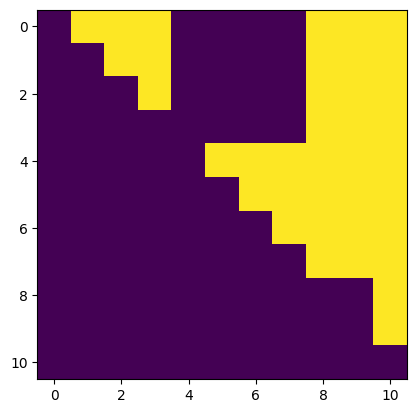

In [8]:
connections = np.zeros((bm.num_nodes, bm.num_nodes), dtype=bool)
plt.imshow(connections)

first_grp_connections = connections.copy()
first_grp_connections[:grp_size, :grp_size] = True
np.fill_diagonal(first_grp_connections, 0)
first_grp_connections = np.triu(first_grp_connections)
first_grp_concts_idxs = np.nonzero(first_grp_connections)
# plt.imshow(first_grp_connections)
# plt.show()

sec_grp_connections = connections.copy()
sec_grp_connections[grp_size:2*grp_size, grp_size:2*grp_size] = True
np.fill_diagonal(sec_grp_connections, 0)
sec_grp_connections = np.triu(sec_grp_connections)
sec_grp_concts_idxs = np.nonzero(sec_grp_connections)
# plt.imshow(sec_grp_connections)
# plt.show()

first_to_hidd_connections = connections.copy()
first_to_hidd_connections[:grp_size, -num_hnodes-1:-1] = True
first_to_hidd_concts_idxs = np.nonzero(first_to_hidd_connections)
# plt.imshow(first_to_hidd_connections)
# plt.show()


sec_to_hidd_connections = connections.copy()
sec_to_hidd_connections[grp_size:2*grp_size, -num_hnodes-1:-1] = True
sec_to_hidd_concts_idxs = np.nonzero(sec_to_hidd_connections)
# plt.imshow(sec_to_hidd_connections)
# plt.show()

all_to_bias_connections = connections.copy()
all_to_bias_connections[:-1, -1] = True
all_to_bias_concts_idxs = np.nonzero(all_to_bias_connections)
# plt.imshow(all_to_bias_connections)
# plt.show()


plt.imshow(first_grp_connections+sec_grp_connections + first_to_hidd_connections + sec_to_hidd_connections + all_to_bias_connections)
plt.show()

In [10]:
p_matrix_series = []
p_prime_matrix_series = []
dir_matrix_series = []
W_matrix_series = []

for i in range(len(bm.learning_debug)):
    p_matrix_series.append(bm.learning_debug[i]['p'])
    p_prime_matrix_series.append(bm.learning_debug[i]['p_prime'])
    dir_matrix_series.append(bm.learning_debug[i]['direction'])
    W_matrix_series.append(bm.learning_debug[i]['W'])

p_matrix_series = np.stack(p_matrix_series, axis=0)
p_prime_matrix_series = np.stack(p_prime_matrix_series, axis=0)
dir_matrix_series = np.stack(dir_matrix_series, axis=0)
W_matrix_series = np.stack(W_matrix_series, axis=0)


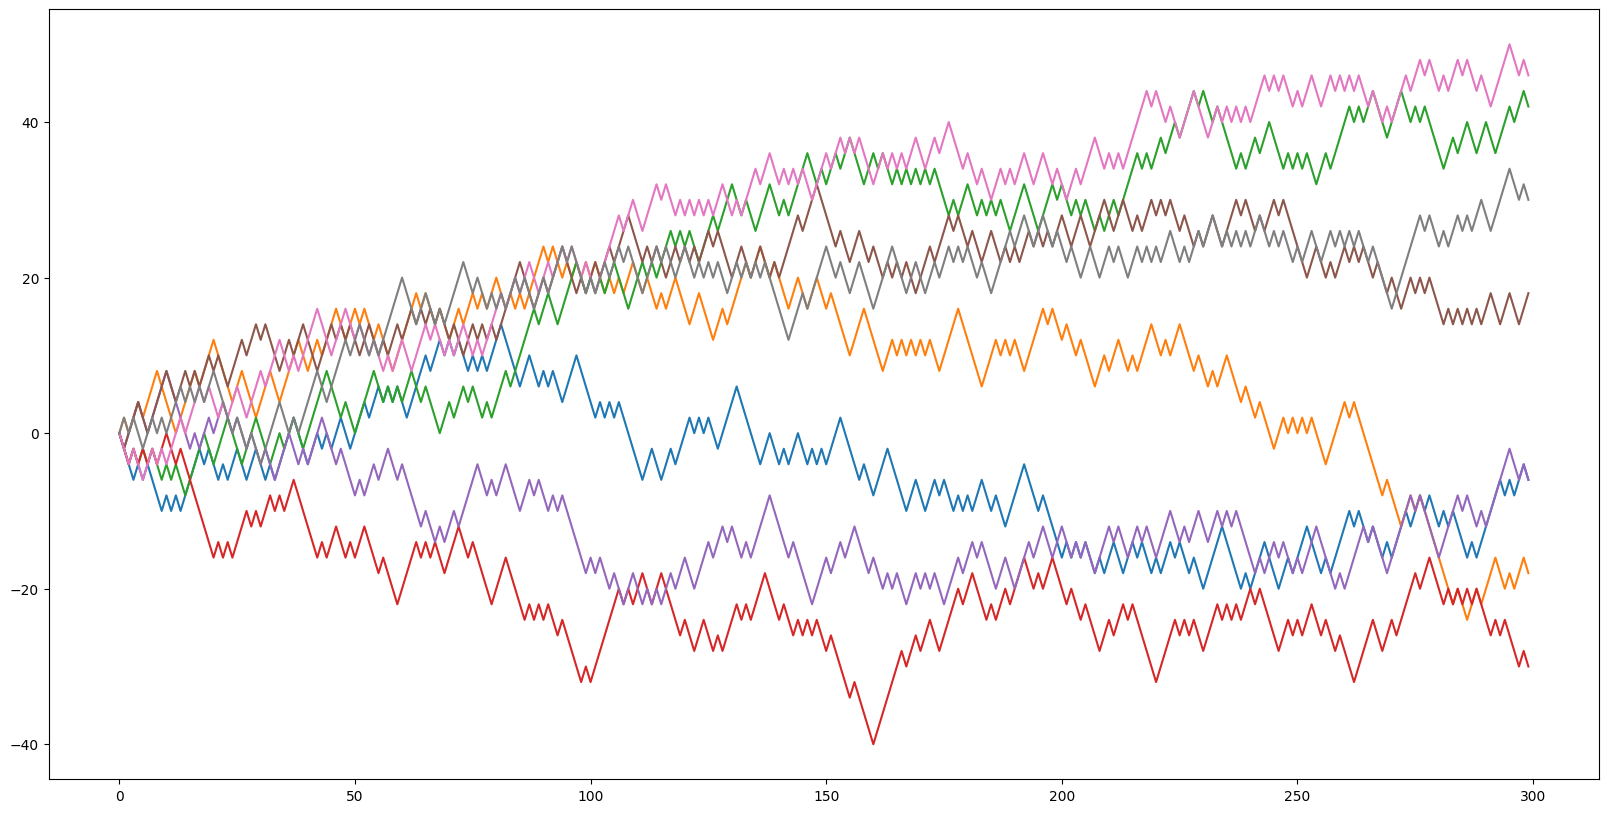

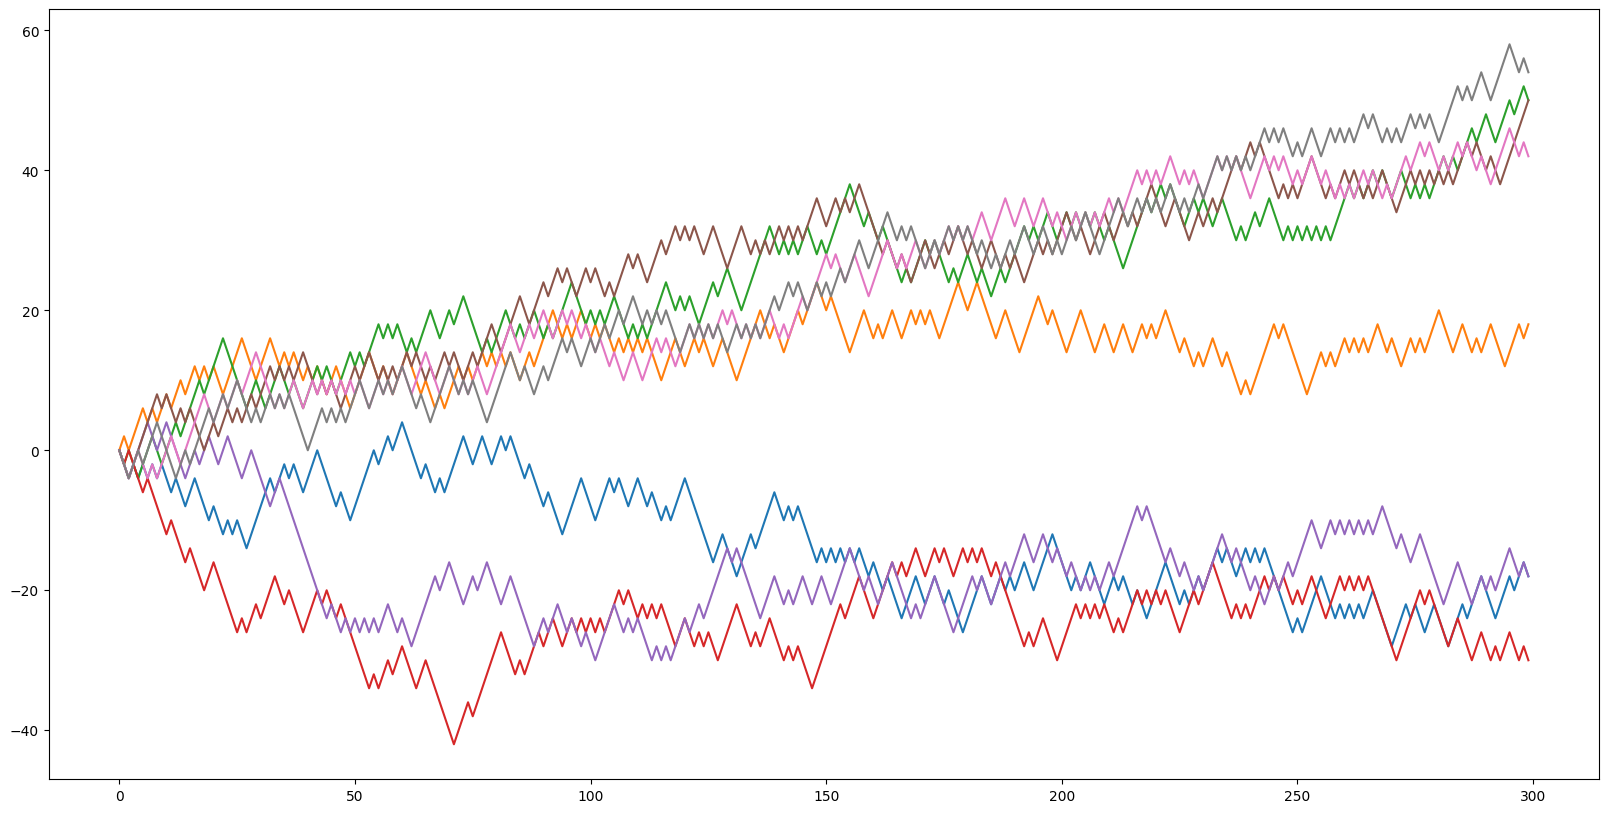

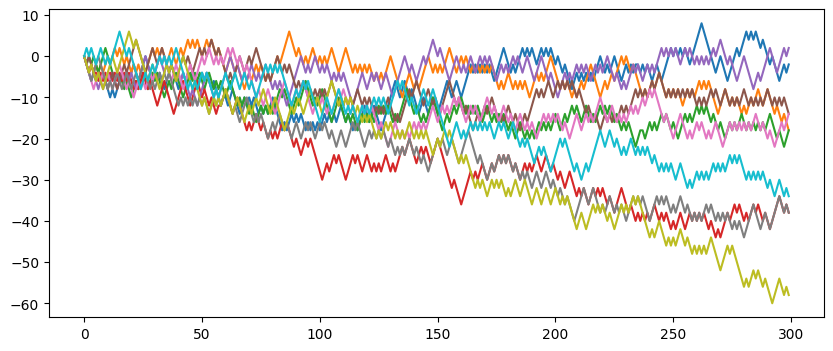

In [7]:
plot_series(W_matrix_series[:, first_grp_concts_idxs[0], first_grp_concts_idxs[1]])
plot_series(W_matrix_series[:, sec_grp_concts_idxs[0], sec_grp_concts_idxs[1]])
plot_series(W_matrix_series[:, first_to_hidd_concts_idxs[0], first_to_hidd_concts_idxs[1]], figsize=(20, 10))
plot_series(W_matrix_series[:, sec_to_hidd_concts_idxs[0], sec_to_hidd_concts_idxs[1]], figsize=(20, 10))
plot_series(W_matrix_series[:, all_to_bias_concts_idxs[0], all_to_bias_concts_idxs[1]])

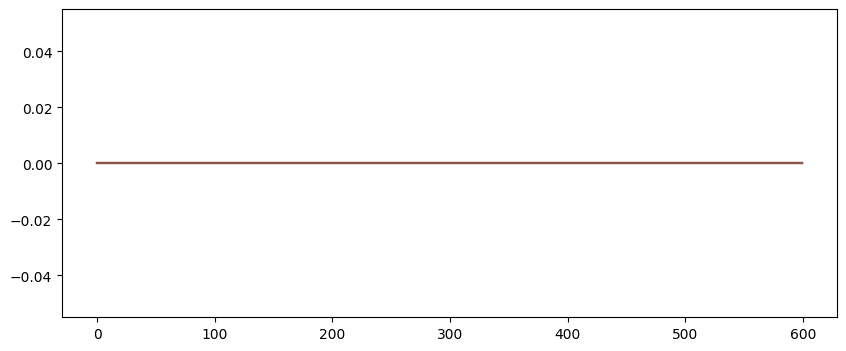

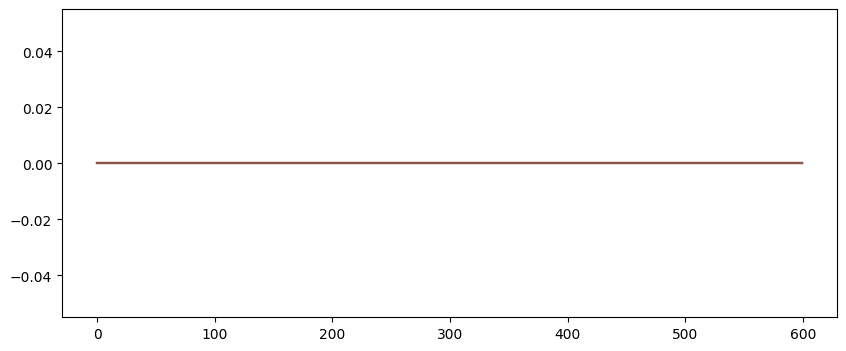

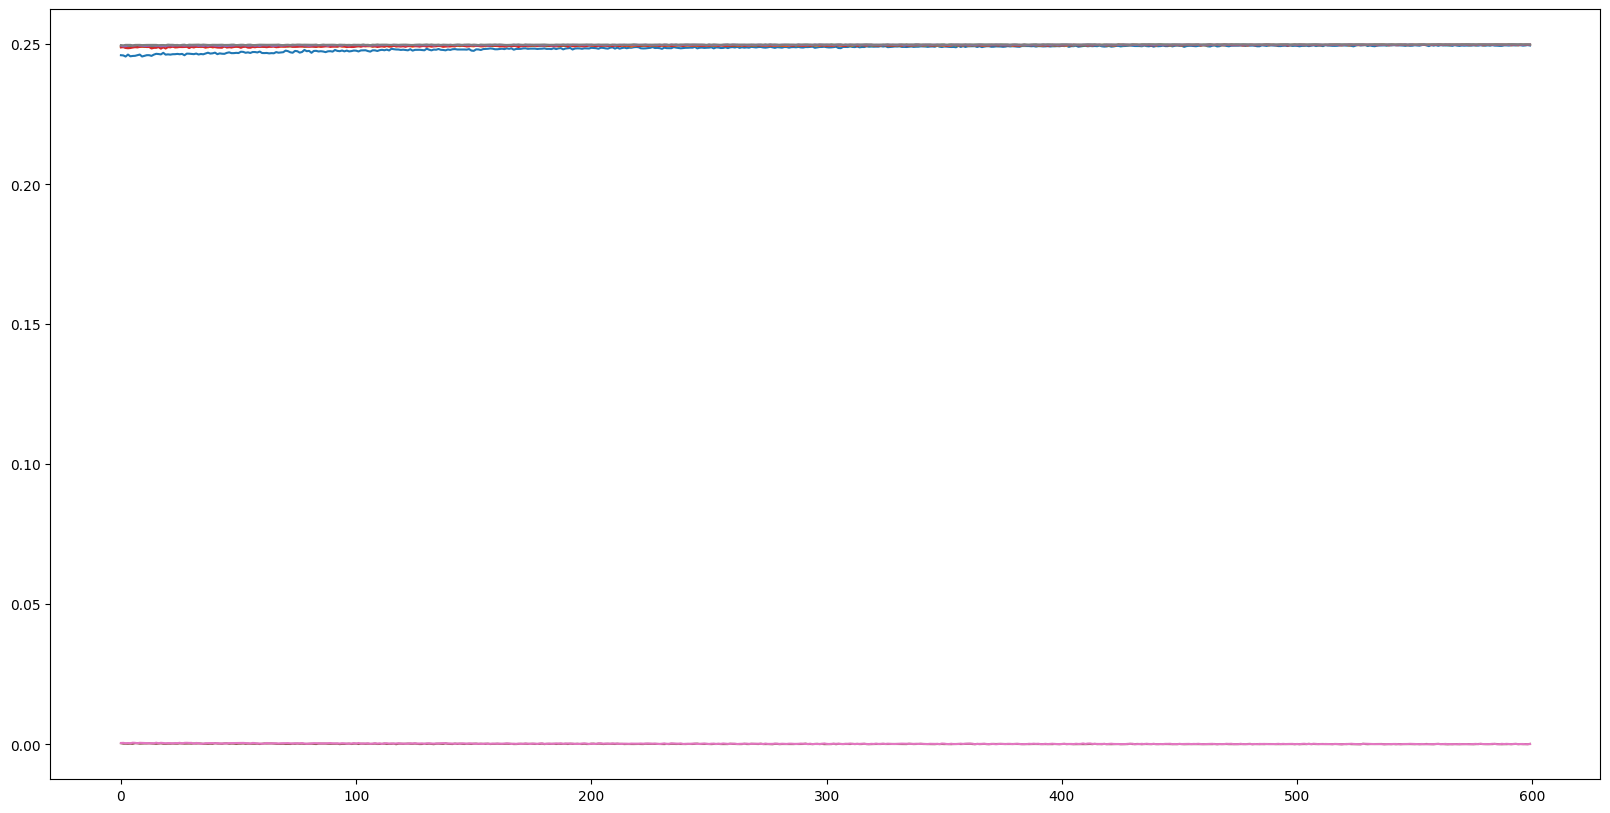

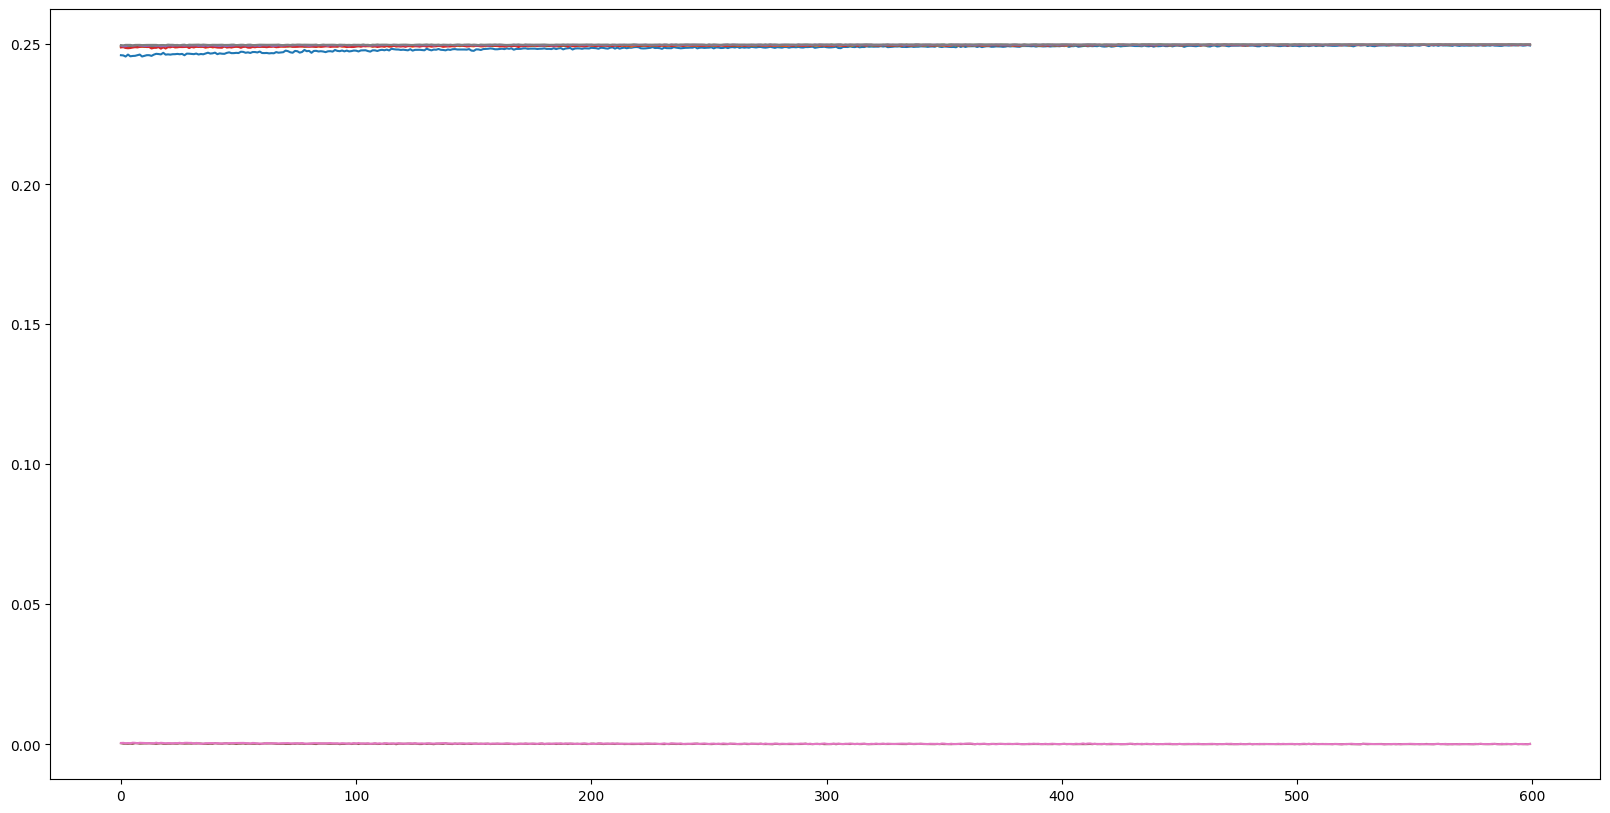

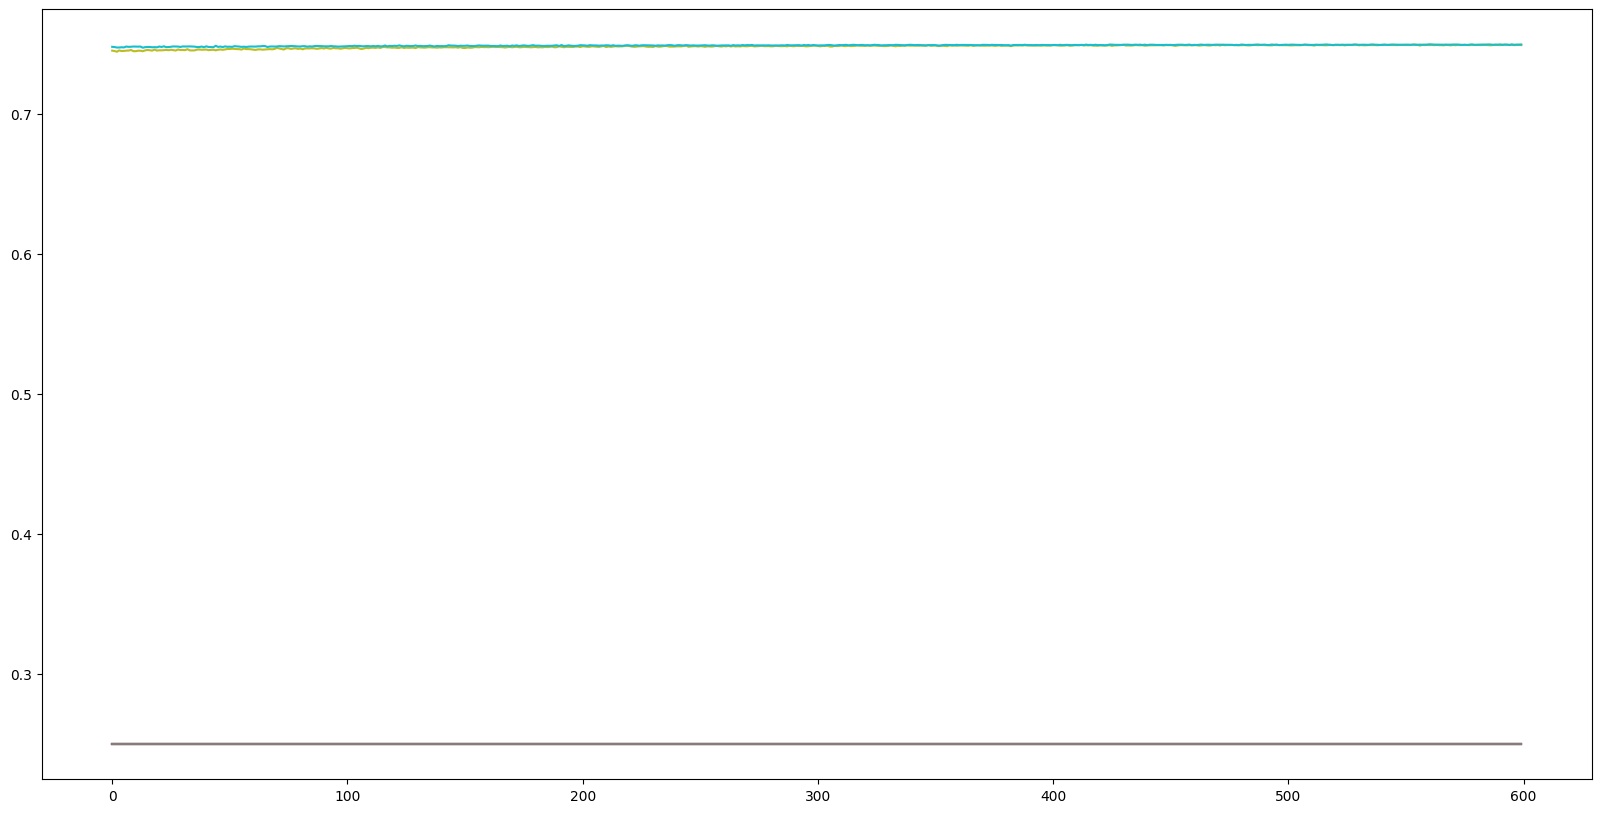

In [ ]:
plot_series(p_matrix_series[:, first_grp_concts_idxs[0], first_grp_concts_idxs[1]])
plot_series(p_matrix_series[:, sec_grp_concts_idxs[0], sec_grp_concts_idxs[1]])
plot_series(p_matrix_series[:, first_to_hidd_concts_idxs[0], first_to_hidd_concts_idxs[1]], figsize=(20, 10))
plot_series(p_matrix_series[:, sec_to_hidd_concts_idxs[0], sec_to_hidd_concts_idxs[1]], figsize=(20, 10))
plot_series(p_matrix_series[:, all_to_bias_concts_idxs[0], all_to_bias_concts_idxs[1]], figsize=(20, 10))

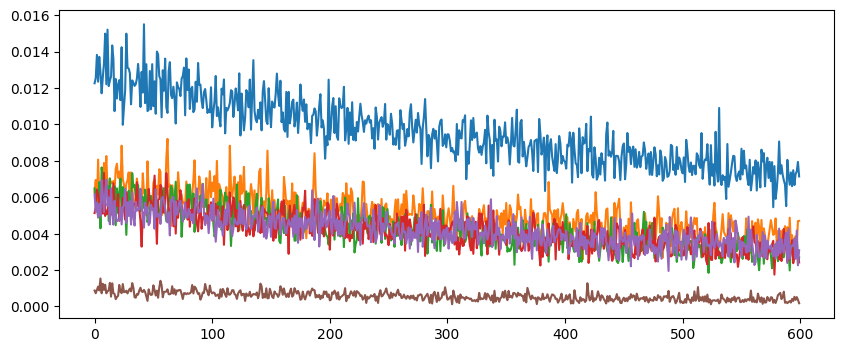

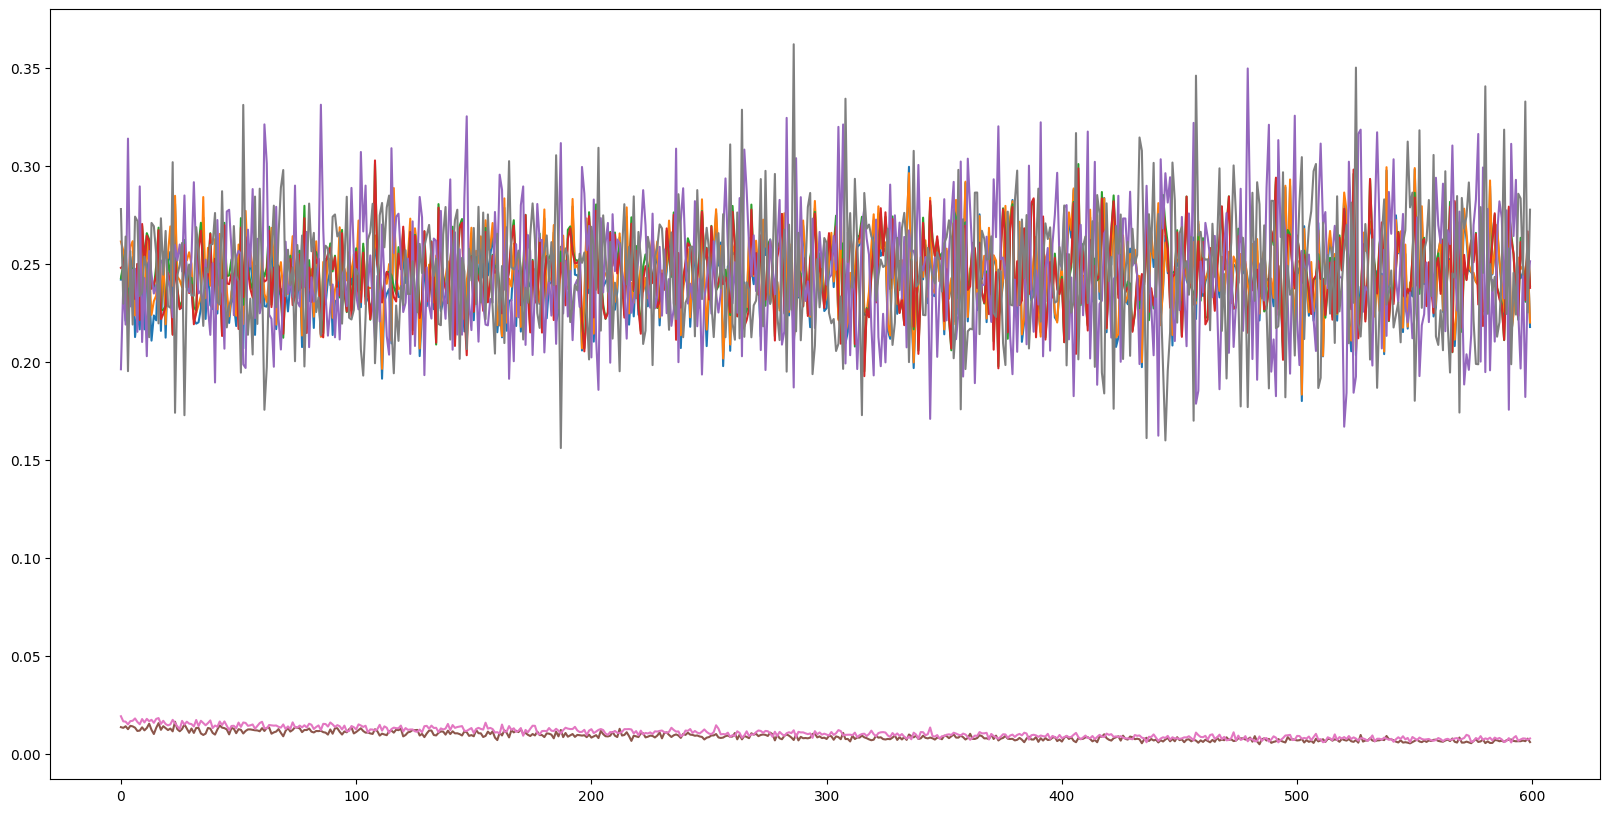

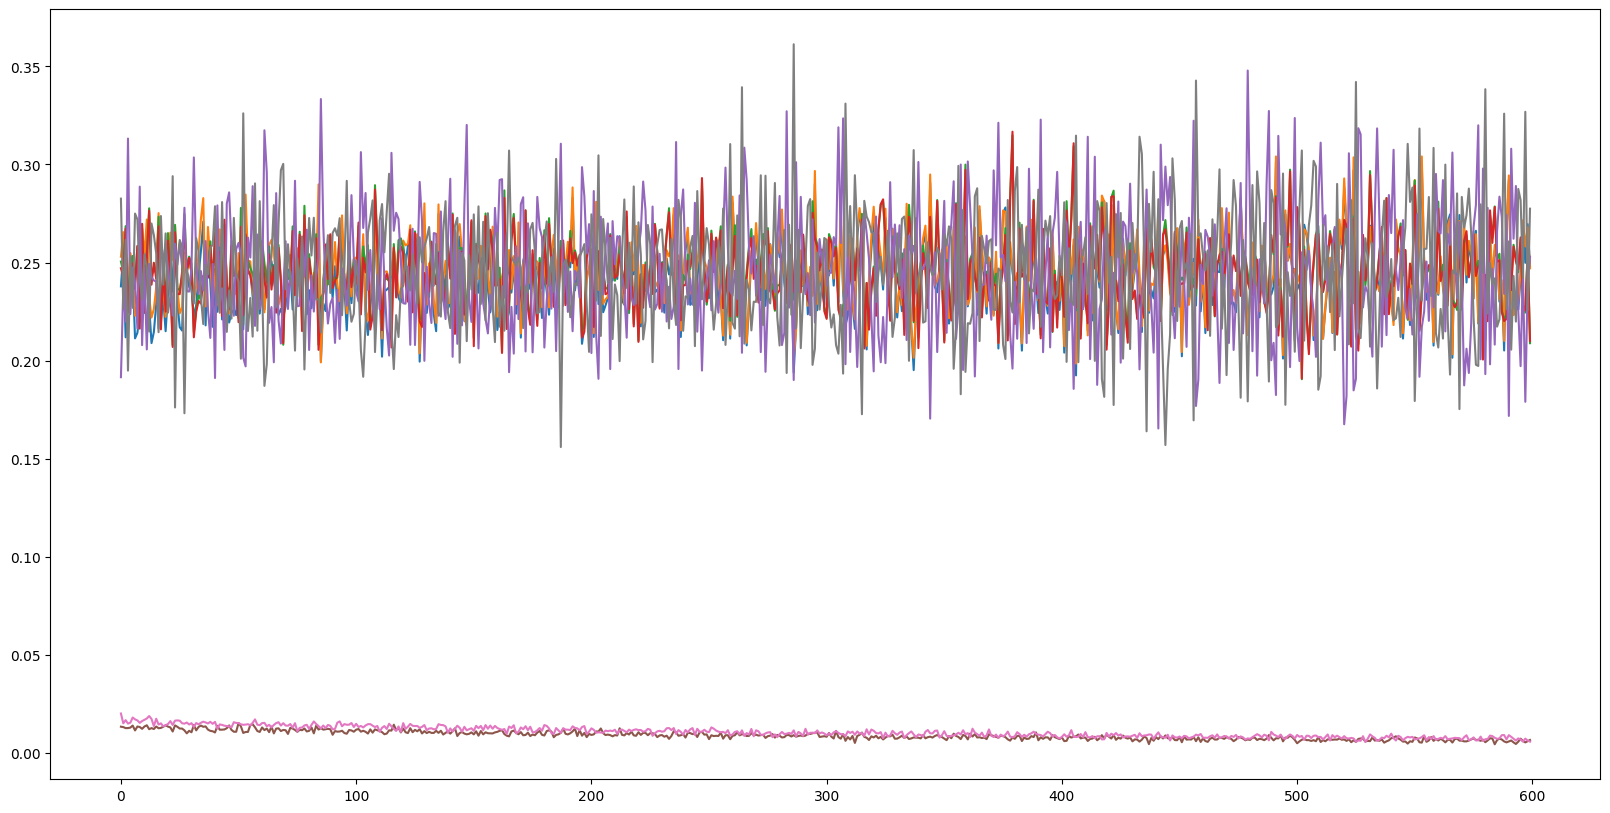

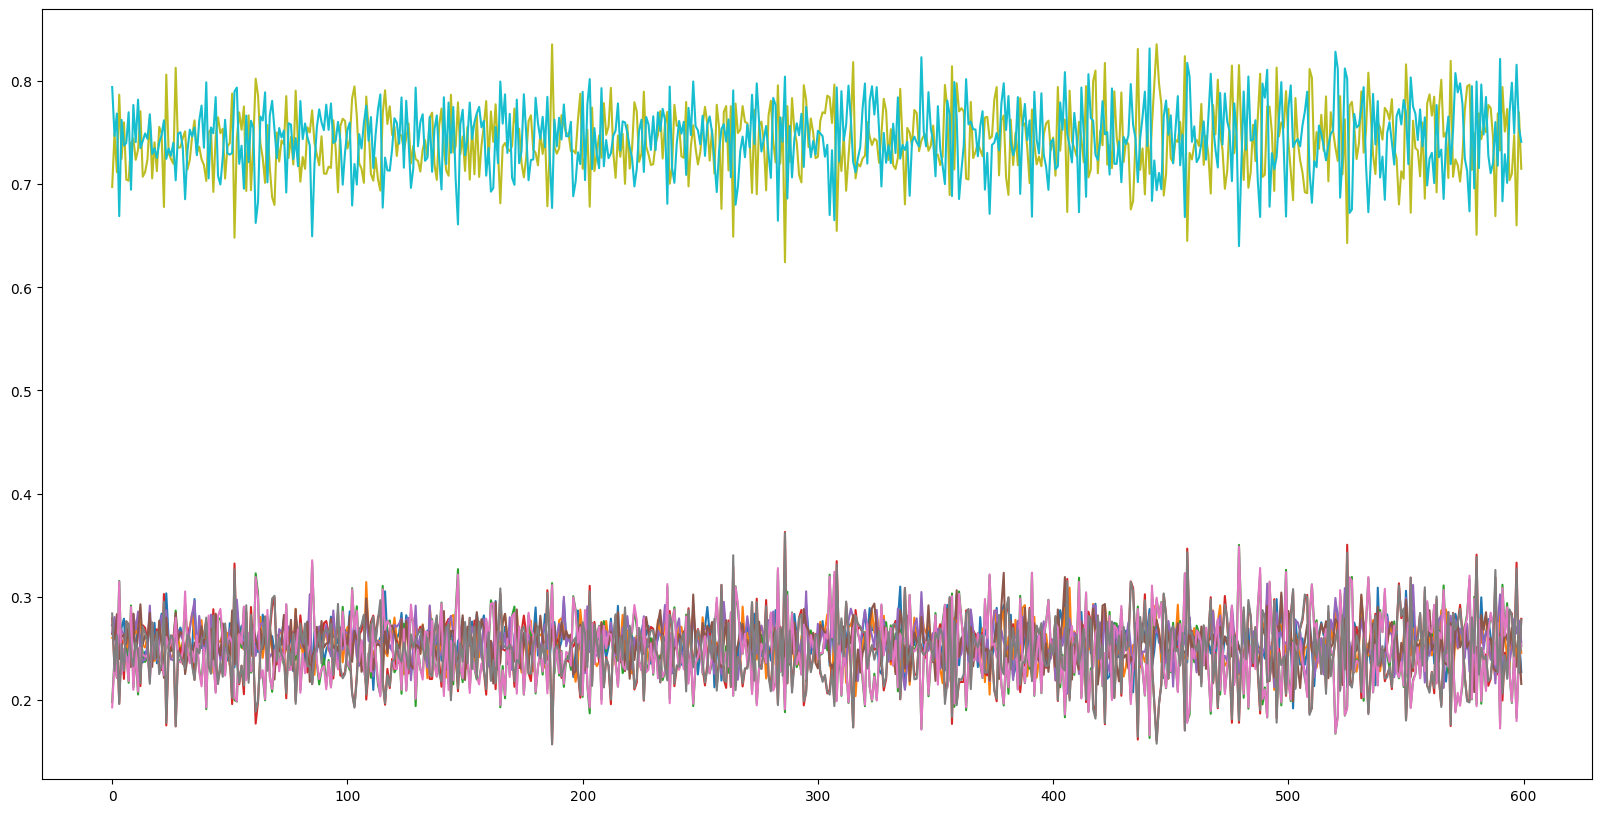

In [ ]:
plot_series(p_prime_matrix_series[:, first_grp_concts_idxs[0], first_grp_concts_idxs[1]])
plot_series(p_prime_matrix_series[:, sec_grp_concts_idxs[0], sec_grp_concts_idxs[1]])
plot_series(p_prime_matrix_series[:, first_to_hidd_concts_idxs[0], first_to_hidd_concts_idxs[1]], figsize=(20, 10))
plot_series(p_prime_matrix_series[:, sec_to_hidd_concts_idxs[0], sec_to_hidd_concts_idxs[1]], figsize=(20, 10))
plot_series(p_prime_matrix_series[:, all_to_bias_concts_idxs[0], all_to_bias_concts_idxs[1]], figsize=(20, 10))

In [11]:
def get_series_data(idxs_arr):
    series_data1 = p_matrix_series[:, idxs_arr[0], idxs_arr[1]] 
    series_data2 = p_prime_matrix_series[:, idxs_arr[0], idxs_arr[1]] 
    series_data12 = dir_matrix_series[:, idxs_arr[0], idxs_arr[1]]
    series_data3 = W_matrix_series[:, idxs_arr[0], idxs_arr[1]]
    return series_data1, series_data2, series_data12, series_data3


def plot_series_data(idxs_arr, plot_p_p_prime=True, plot_dir=True, plot_W=True):
    series_data1, series_data2, series_data12, series_data3 = get_series_data(idxs_arr)
    for i in range(series_data1.shape[1]):
        if plot_p_p_prime:
            fig = go.Figure()
            fig.add_trace(go.Scatter(y=series_data1[:, i],
                                    mode='lines', 
                                    marker_color = 'green',
                                    name = f'p_{i+1}'))
            fig.add_trace(go.Scatter(y=series_data2[:, i],
                                mode='lines',
                                marker_color = 'red',
                                name = f'p_prime_{i+1}'))

            fig.show()

        if plot_dir:
            fig = go.Figure()
            fig.add_trace(go.Scatter(y=series_data12[:, i],
                                    mode='lines', 
                                    marker_color = 'blue'))
            fig.update_layout(
                title=dict(
                    text= f'dir_{i+1}'
                ))
            
            fig.show()

        if plot_W:
            fig = go.Figure()
            fig.add_trace(go.Scatter(y=series_data3[:, i],
                                    mode='lines', 
                                    marker_color = 'orange'))
            fig.update_layout(
                title=dict(
                    text= f'W_{i+1}'
                ))
            fig.show()




    


# series_data4 = p_matrix_series[:, sec_to_hidd_concts_idxs[0], sec_to_hidd_concts_idxs[1]] 
# series_data5 = p_prime_matrix_series[:, sec_to_hidd_concts_idxs[0], sec_to_hidd_concts_idxs[1]] 
# series_data45 = dir_matrix_series[:, sec_to_hidd_concts_idxs[0], sec_to_hidd_concts_idxs[1]]
# series_data6 = W_matrix_series[:, sec_to_hidd_concts_idxs[0], sec_to_hidd_concts_idxs[1]]

# axis1_idxs = np.append(all_to_bias_concts_idxs[0][:4], all_to_bias_concts_idxs[0][-2:])
# axis2_idxs = np.append(all_to_bias_concts_idxs[1][:4], all_to_bias_concts_idxs[1][-2:])

# series_data7 = p_matrix_series[:, axis1_idxs, axis2_idxs]
# series_data8 = p_prime_matrix_series[:, axis1_idxs, axis2_idxs]
# series_data78 = dir_matrix_series[:, axis1_idxs, axis2_idxs]
# series_data9 = W_matrix_series[:, axis1_idxs, axis2_idxs]


# figsize=(20, 10)
# for i in range(series_data1.shape[1]):
#     plt.figure(figsize=figsize)
#     plt.plot(series_data1[:, i], color='g', linestyle='dotted')
#     plt.plot(series_data2[:, i], color='r', linestyle='dotted')
#     plt.title(i+1)
#     plt.show()

#     plt.figure(figsize=figsize)
#     plt.plot(series_data12[:, i], color='orange')
#     plt.title(i+1)
#     plt.grid()
#     plt.show()

#     plt.figure(figsize=figsize)
#     plt.plot(series_data3[:, i], color='b')
#     plt.title(i+1)
#     plt.show()

In [32]:
for i in range(8):
    signs_ = np.sign(series_data12[:, i])
    print((signs_[:600]==1).sum(), (signs_[600:1200]==1).sum(), (signs_[1200:]==1).sum())

402 445 392
525 471 357
529 504 360
500 515 368
513 461 337
245 0 0
302 0 0
545 493 324


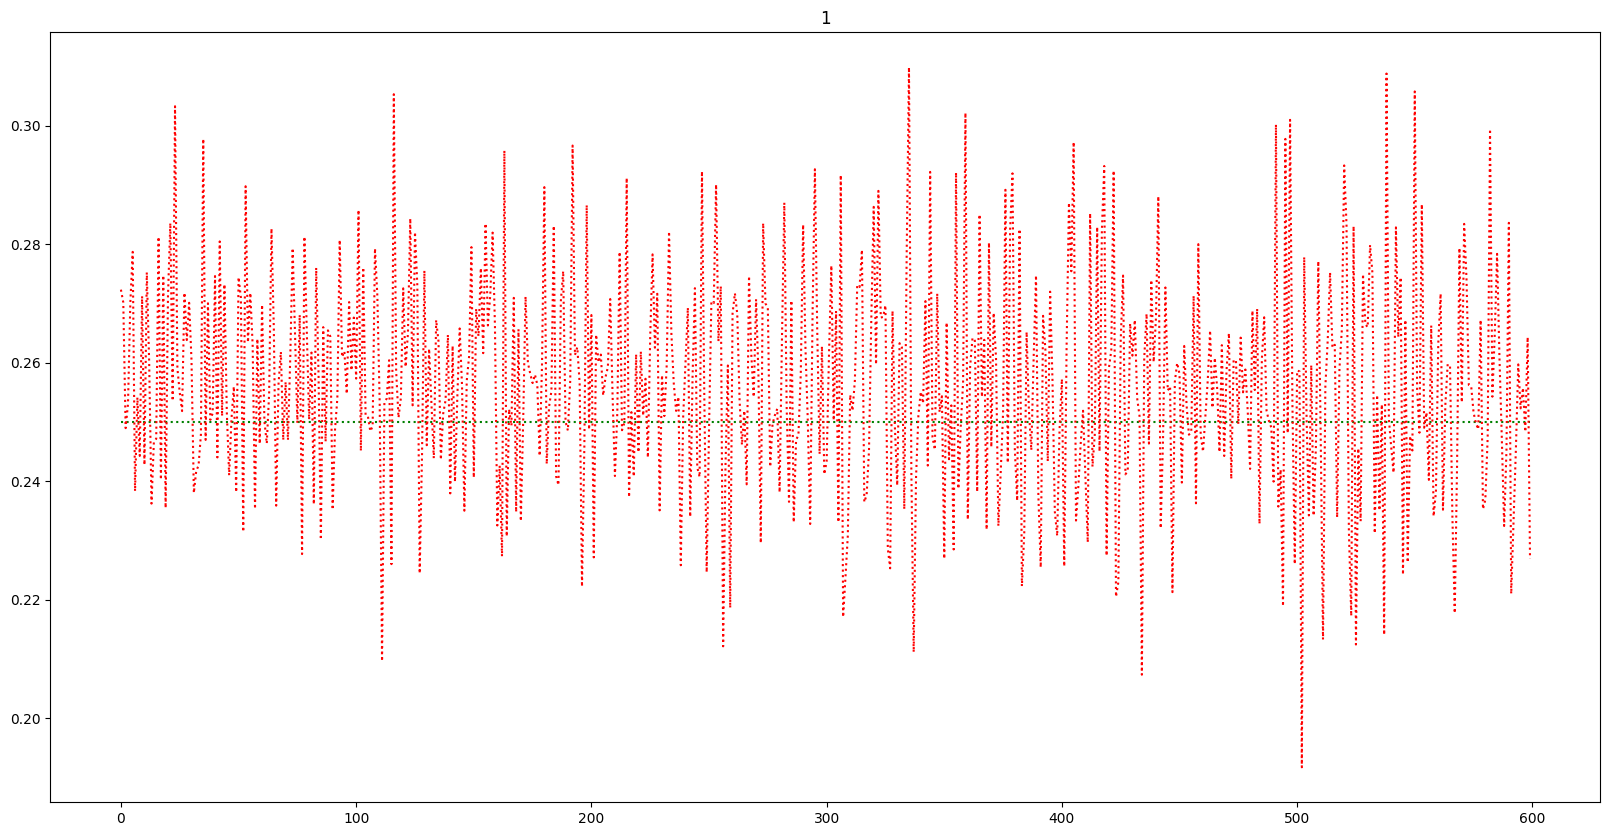

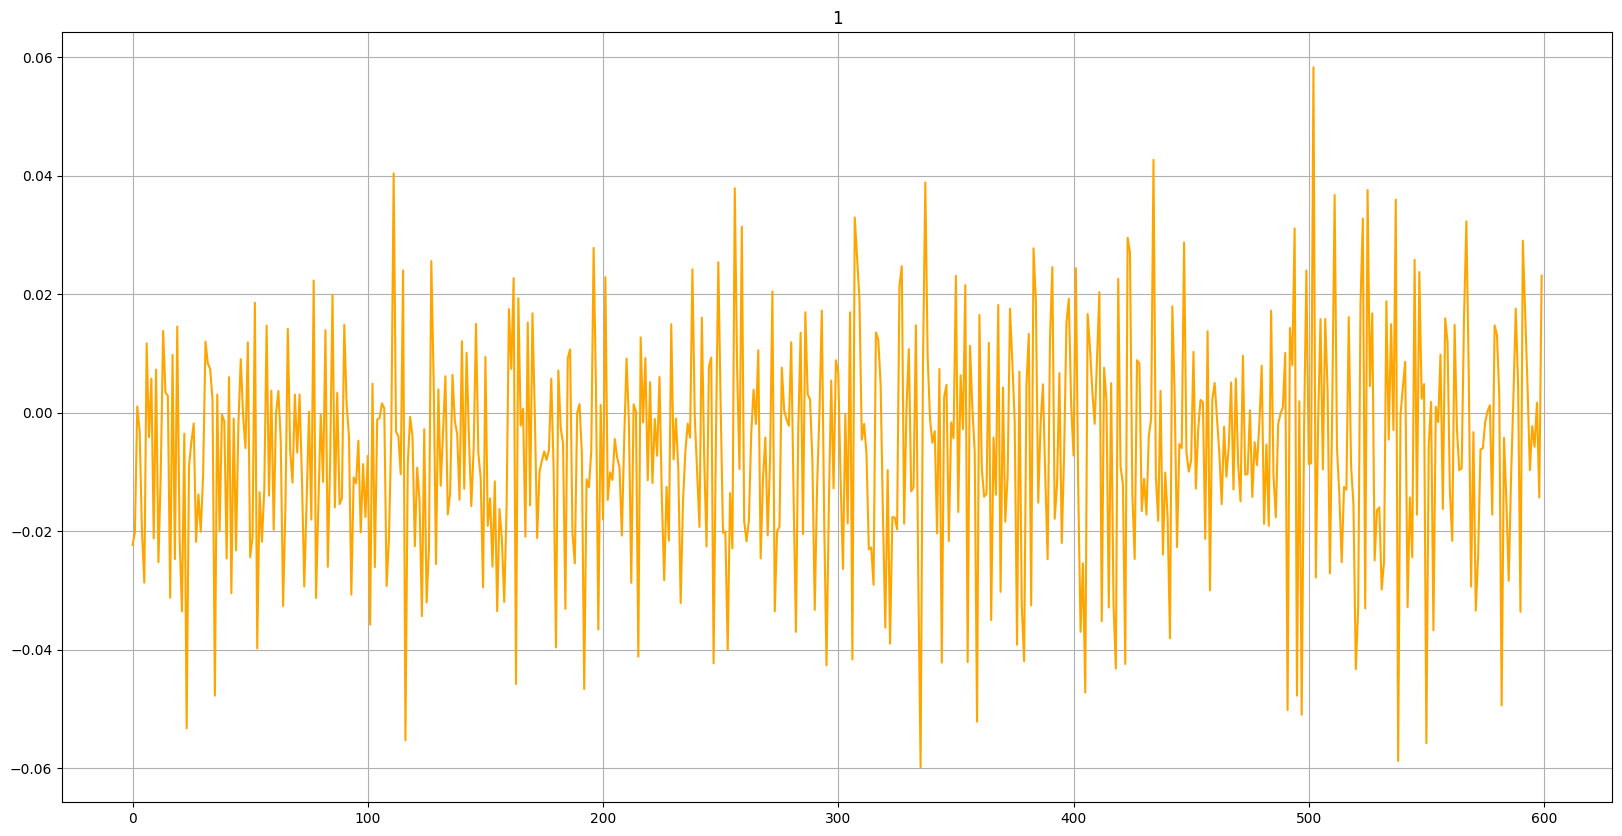

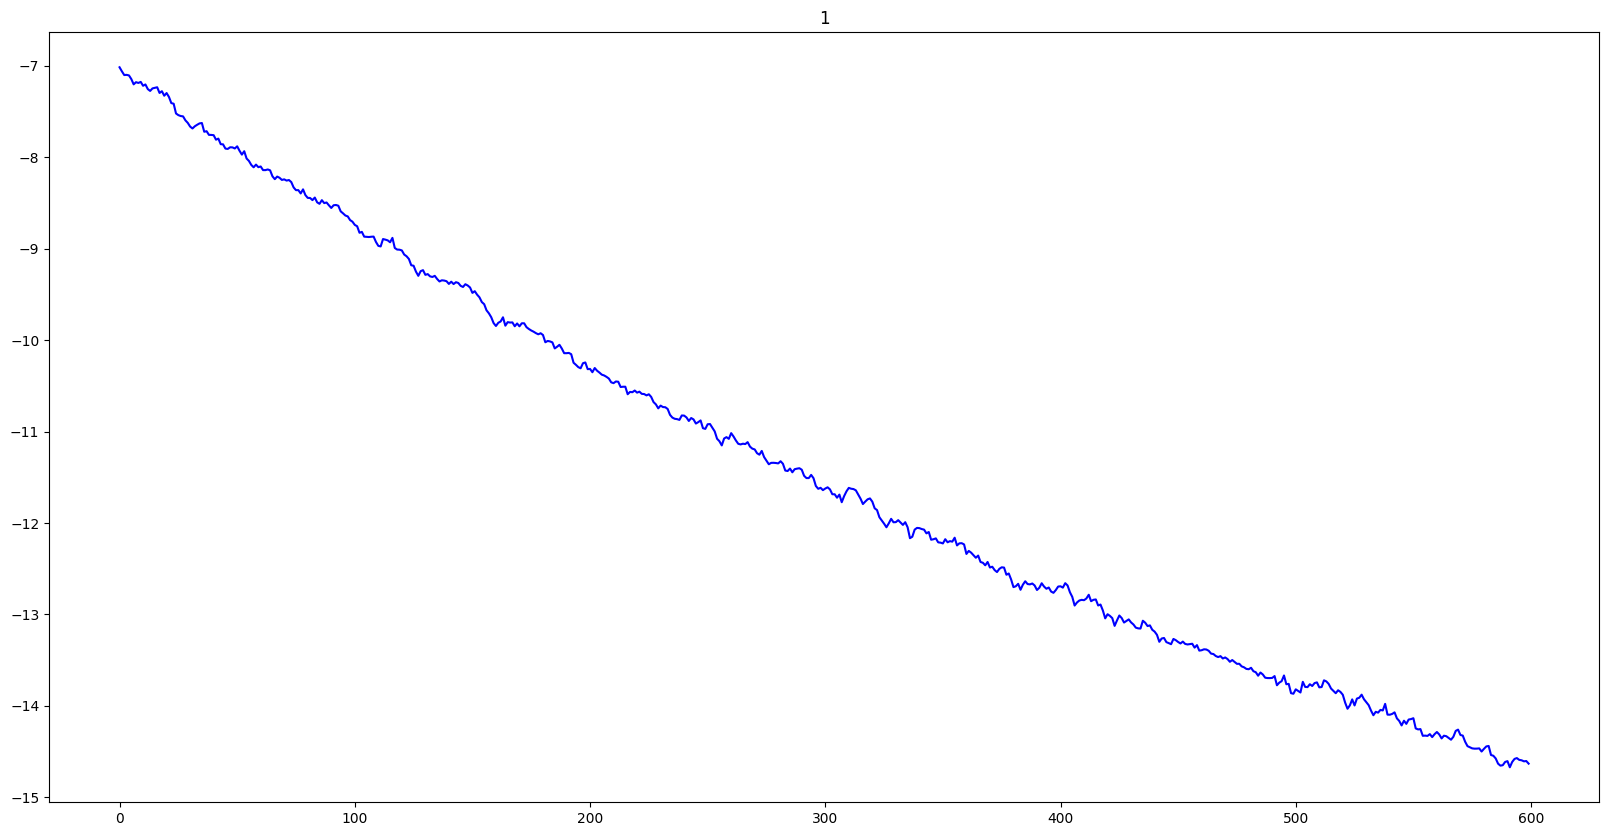

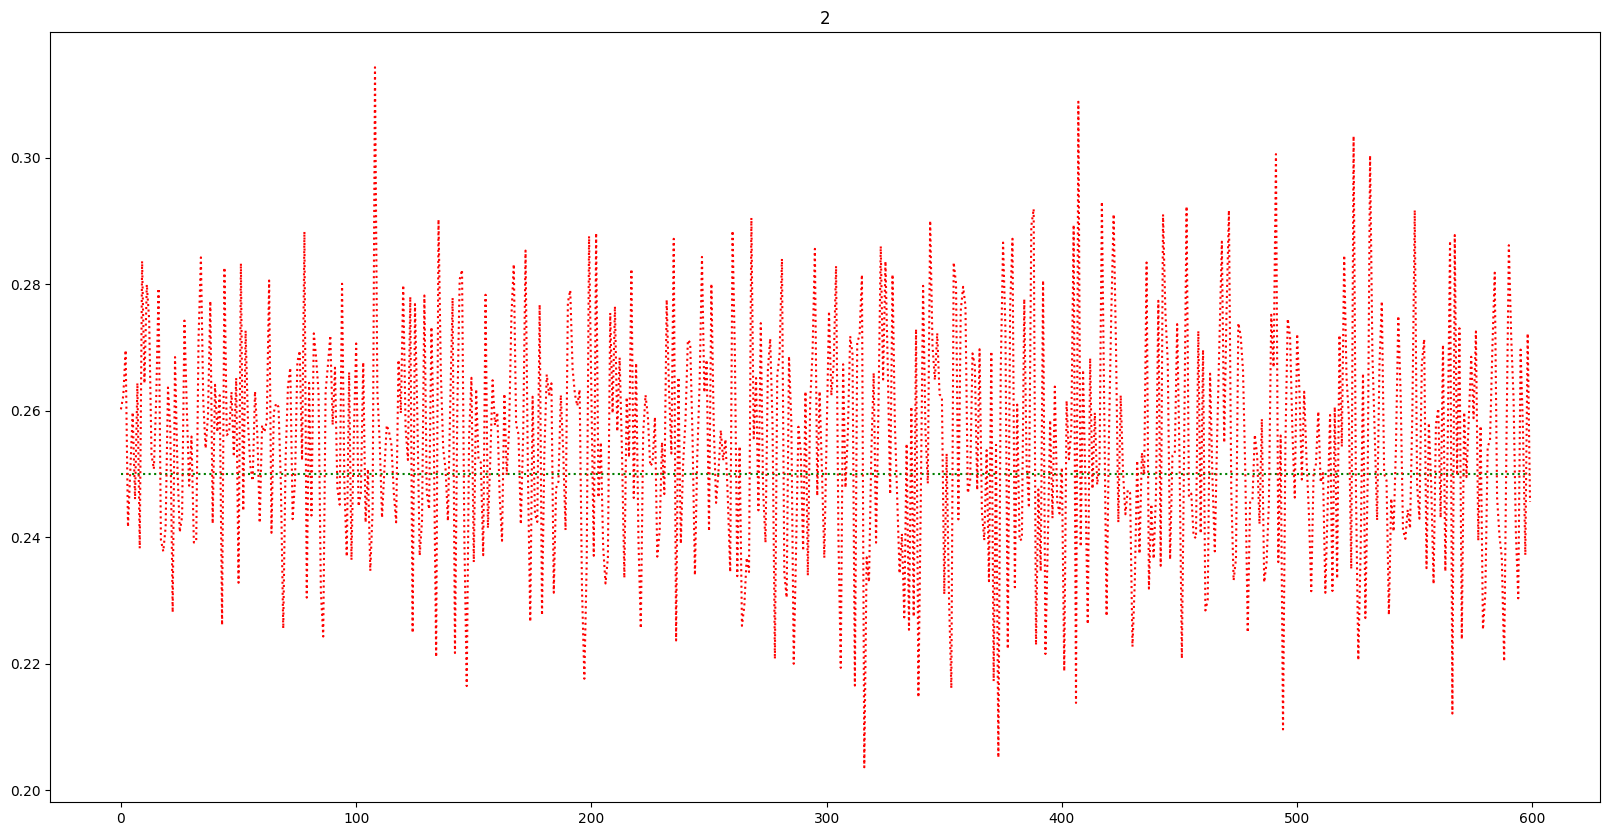

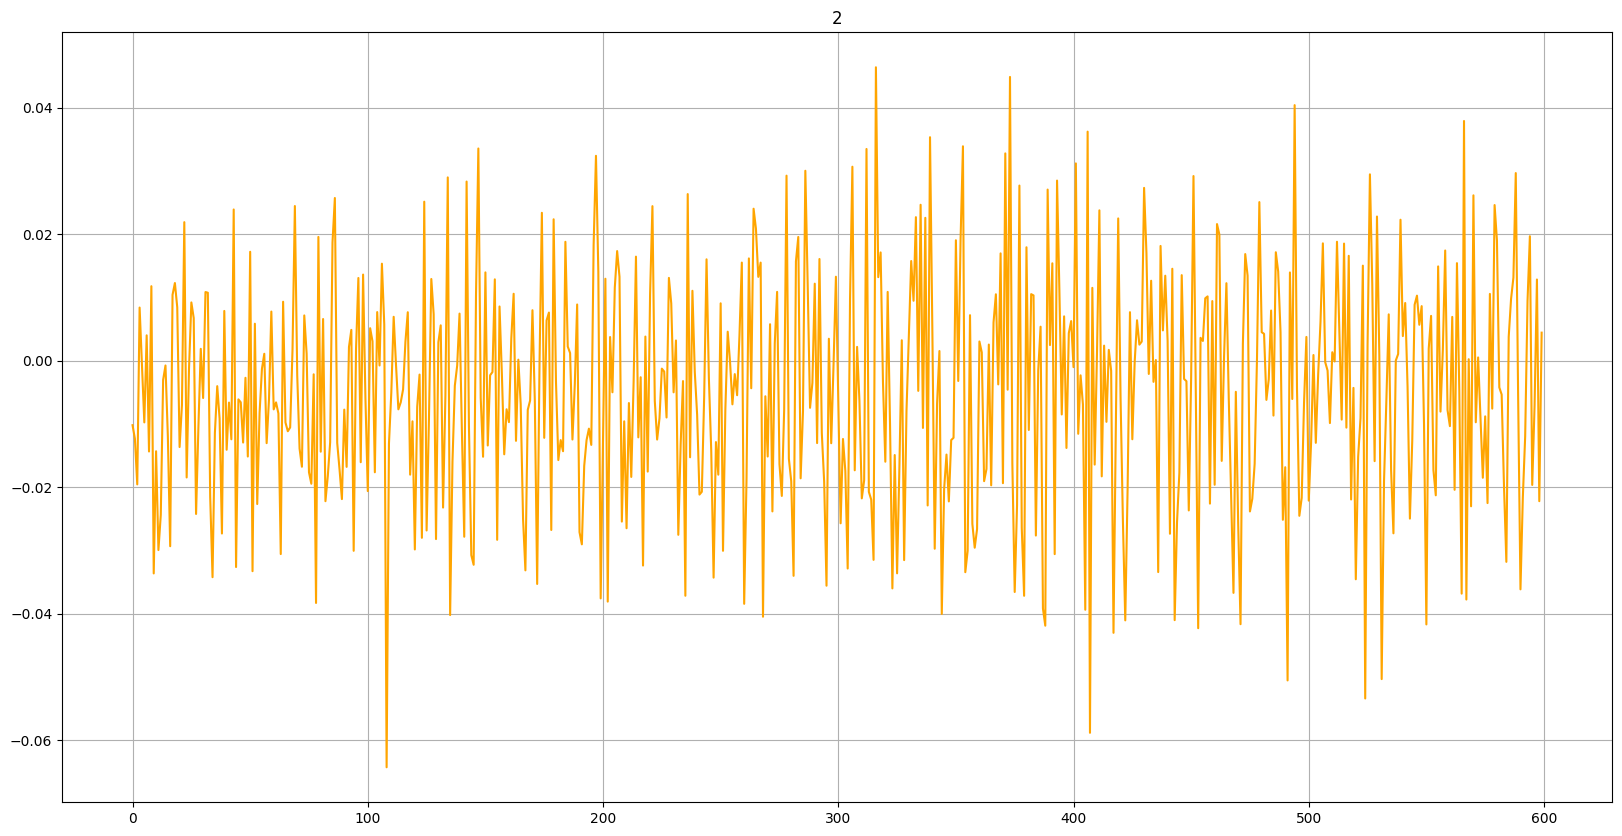

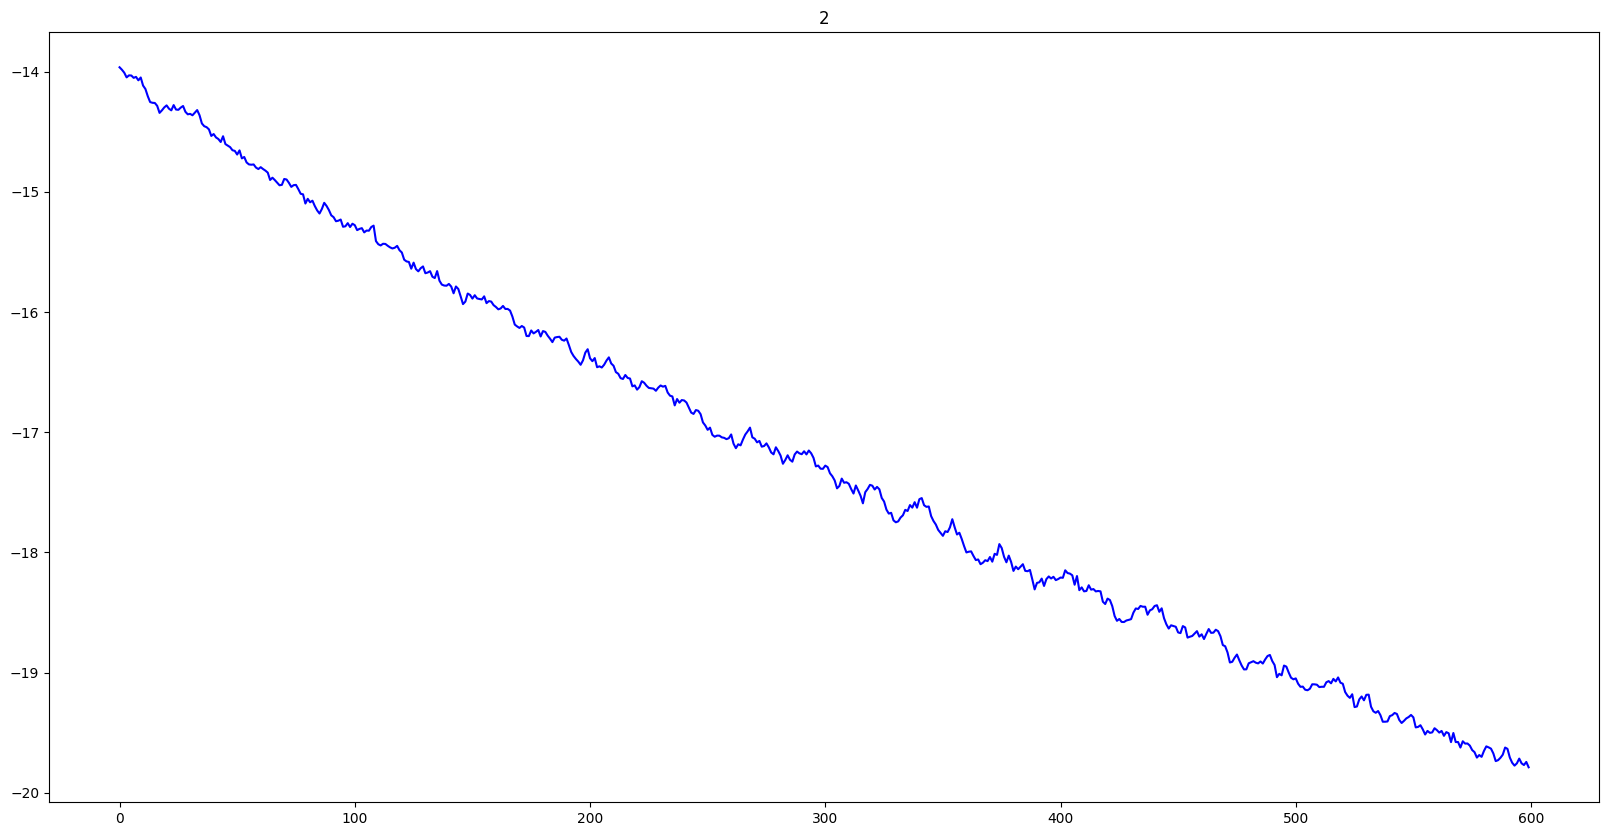

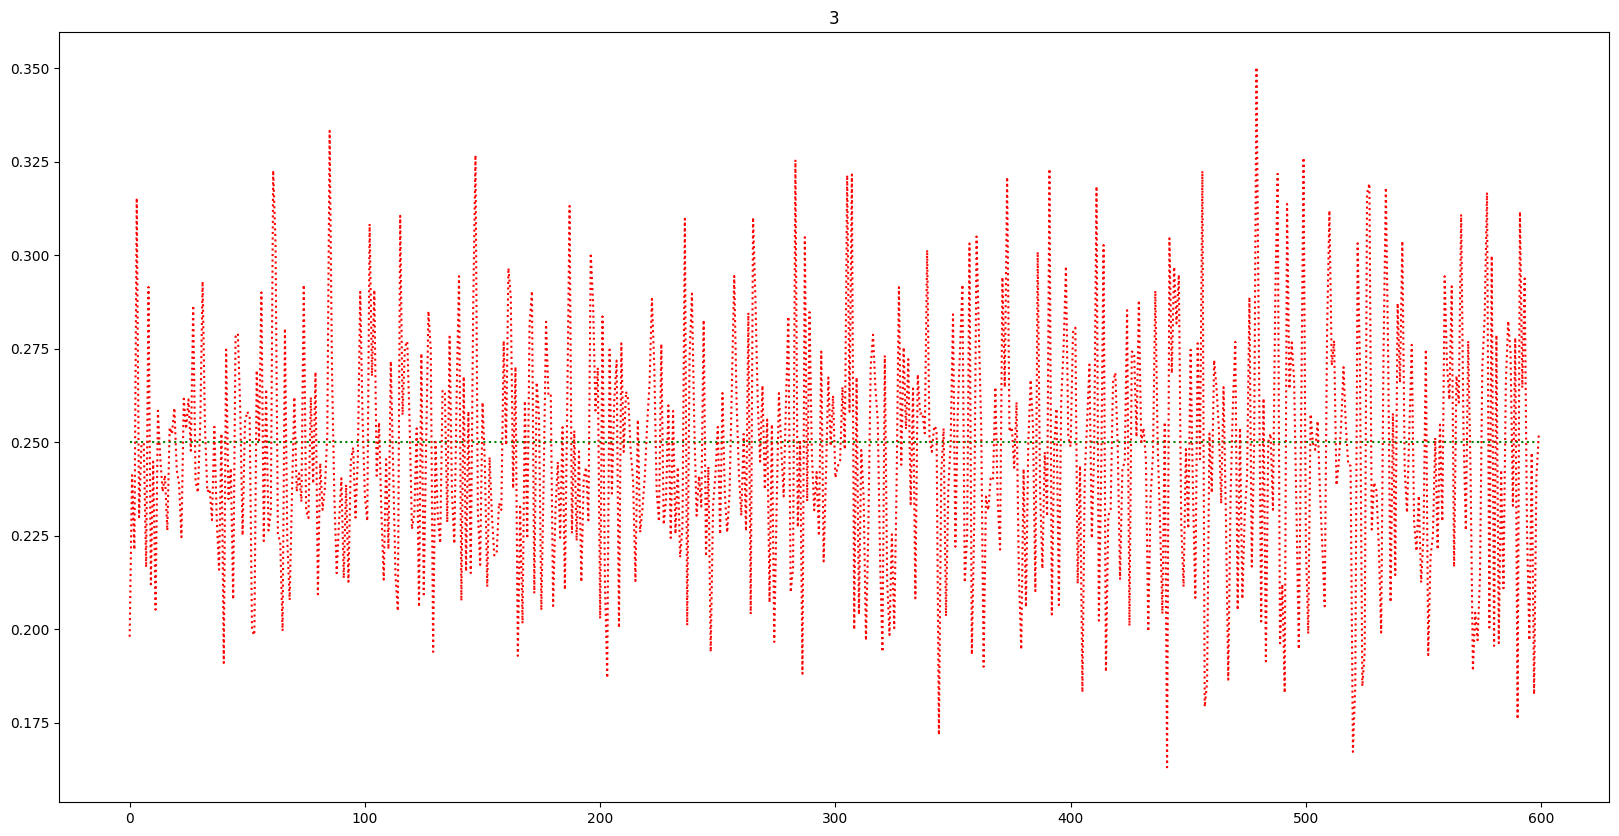

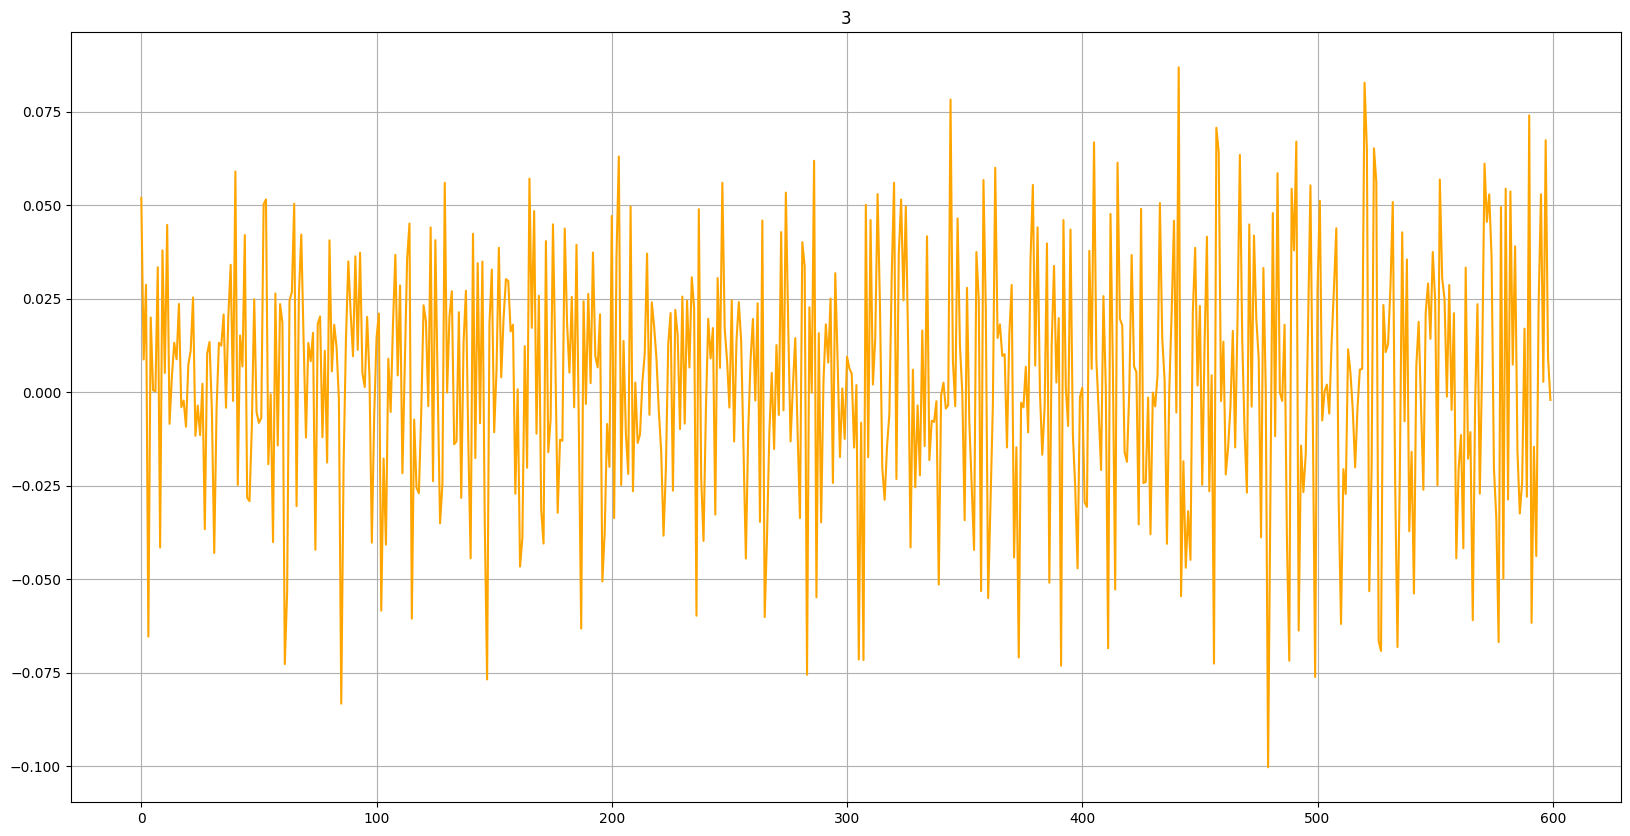

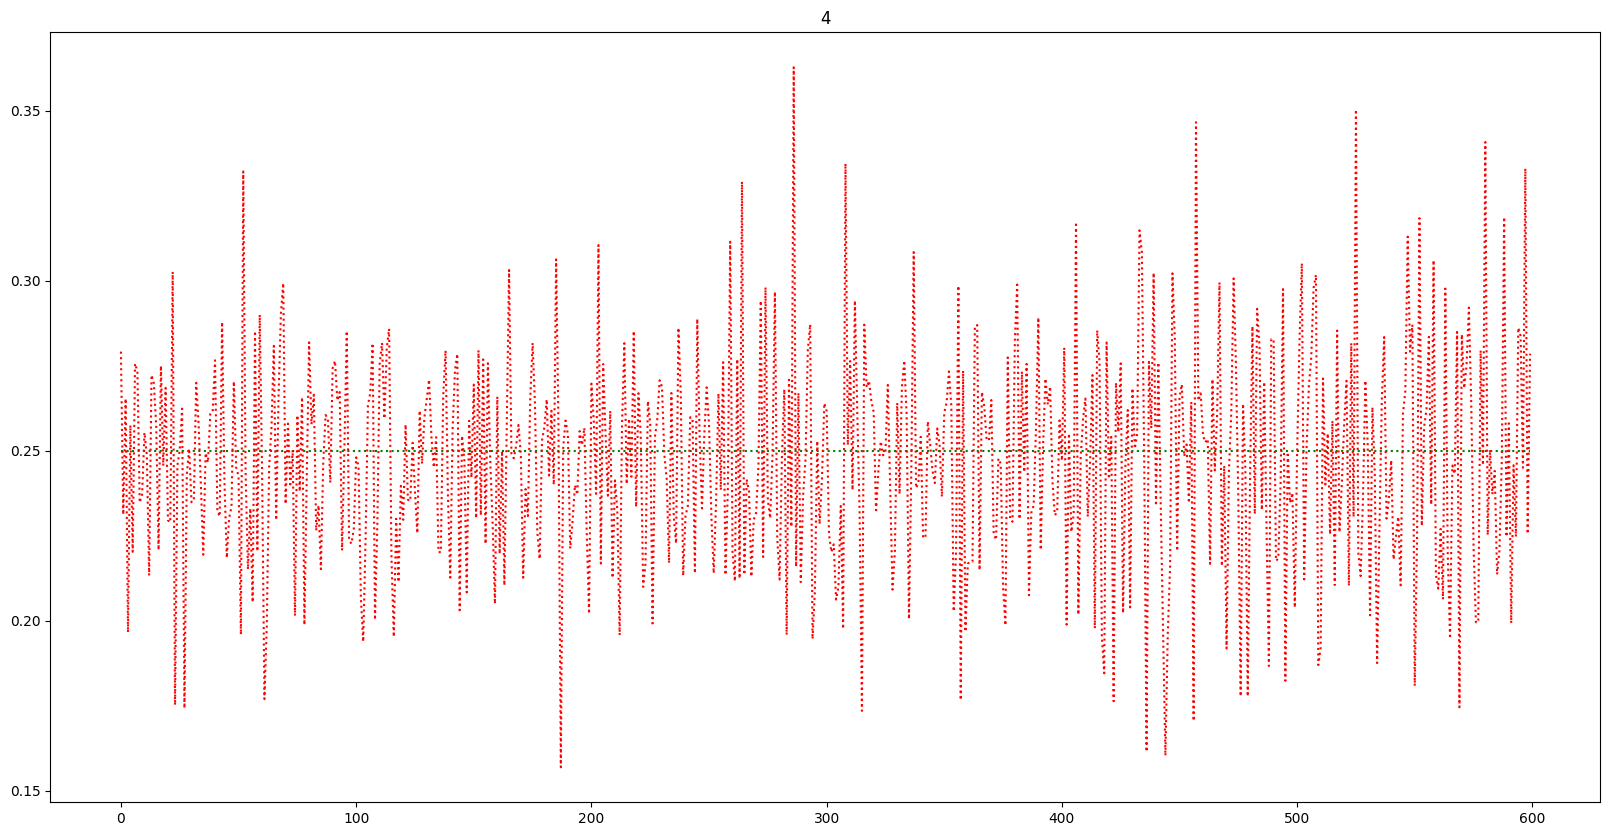

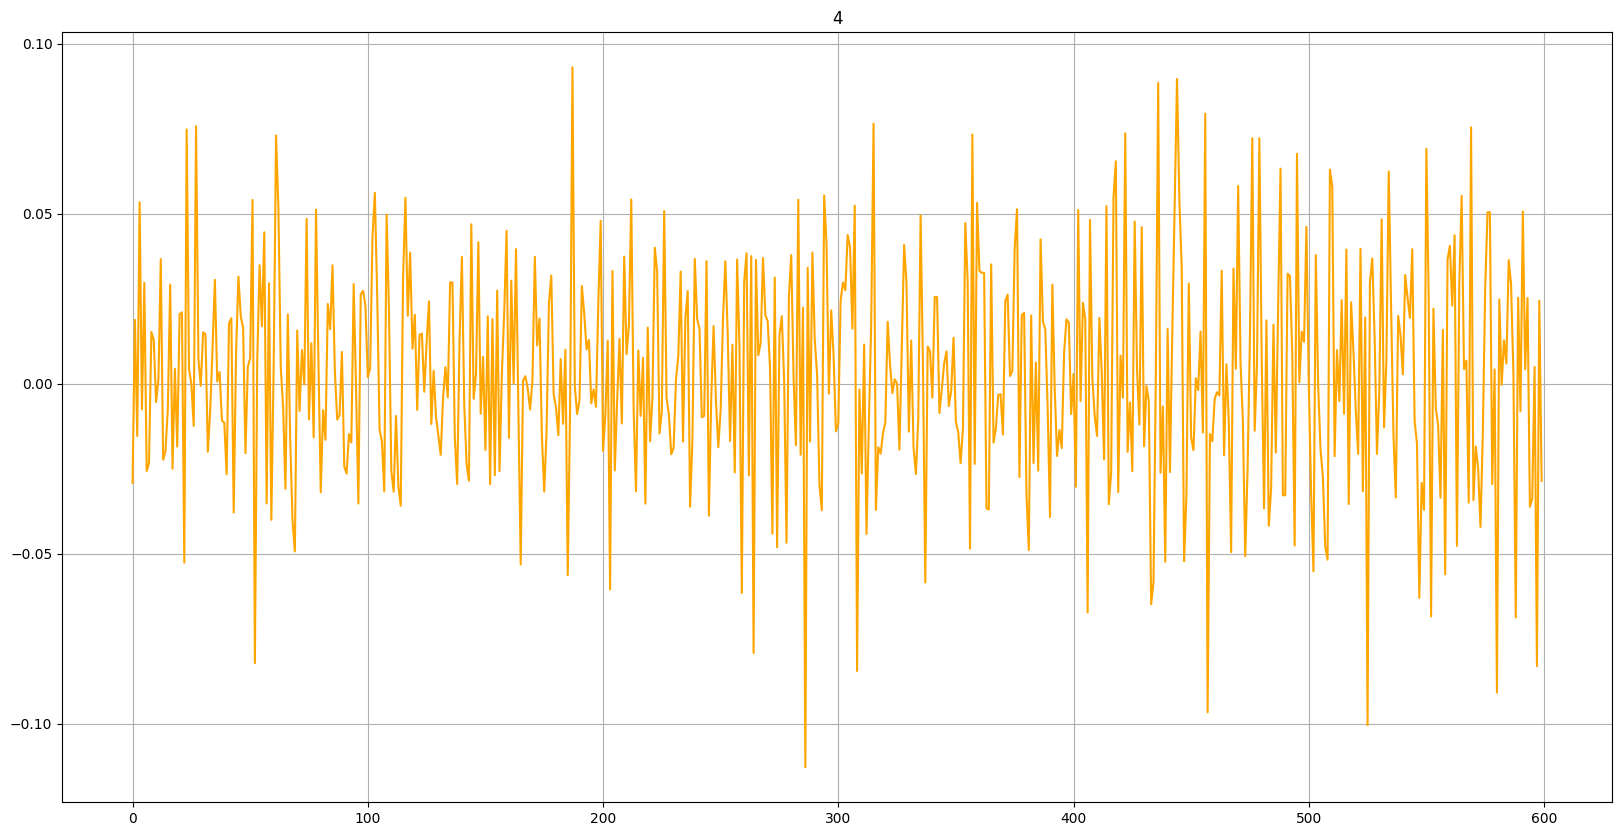

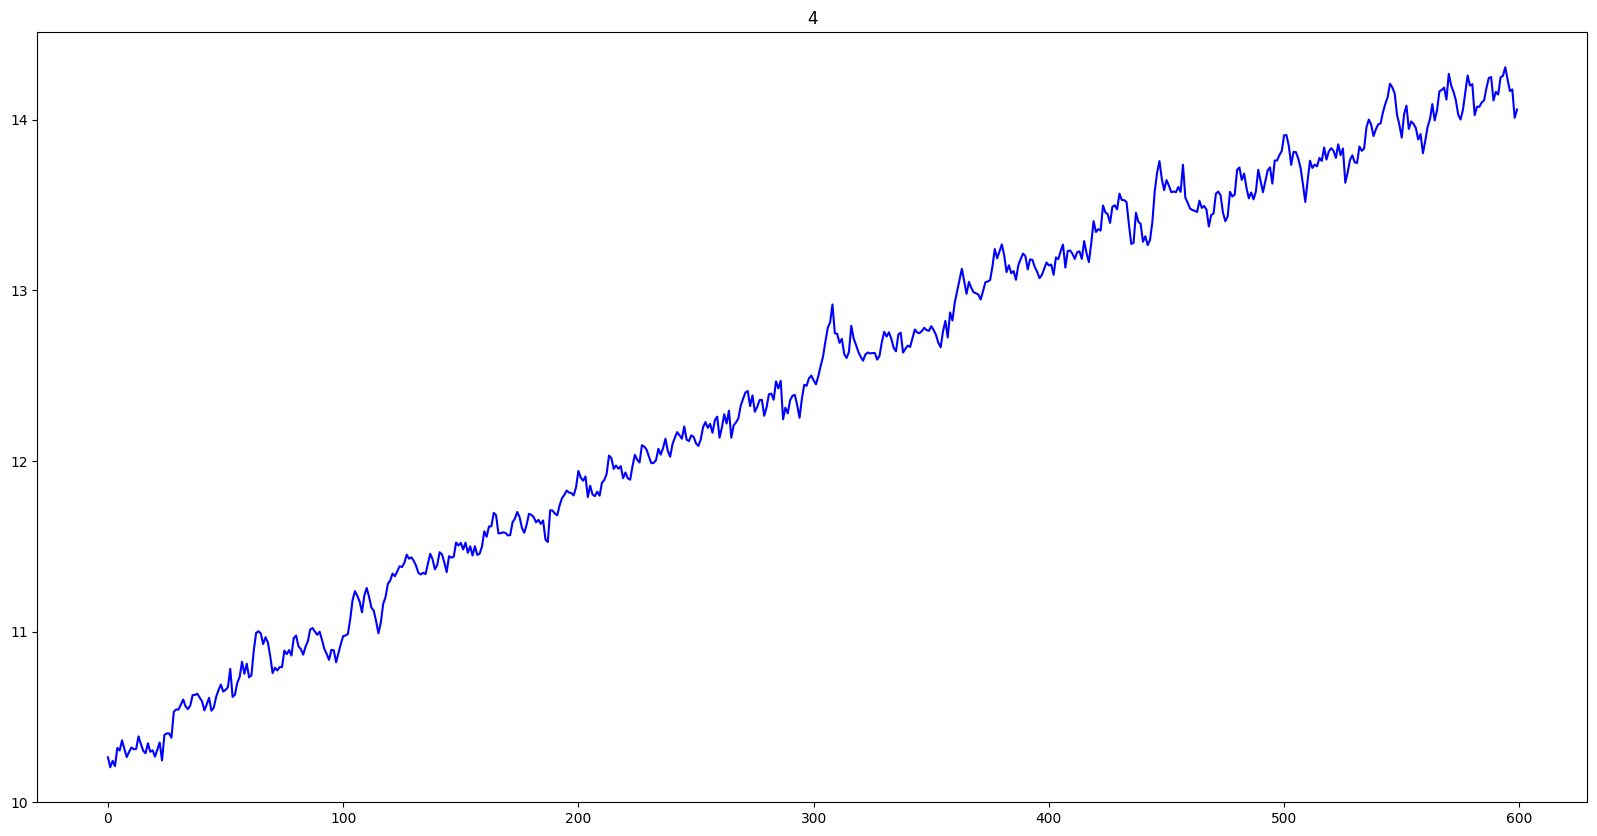

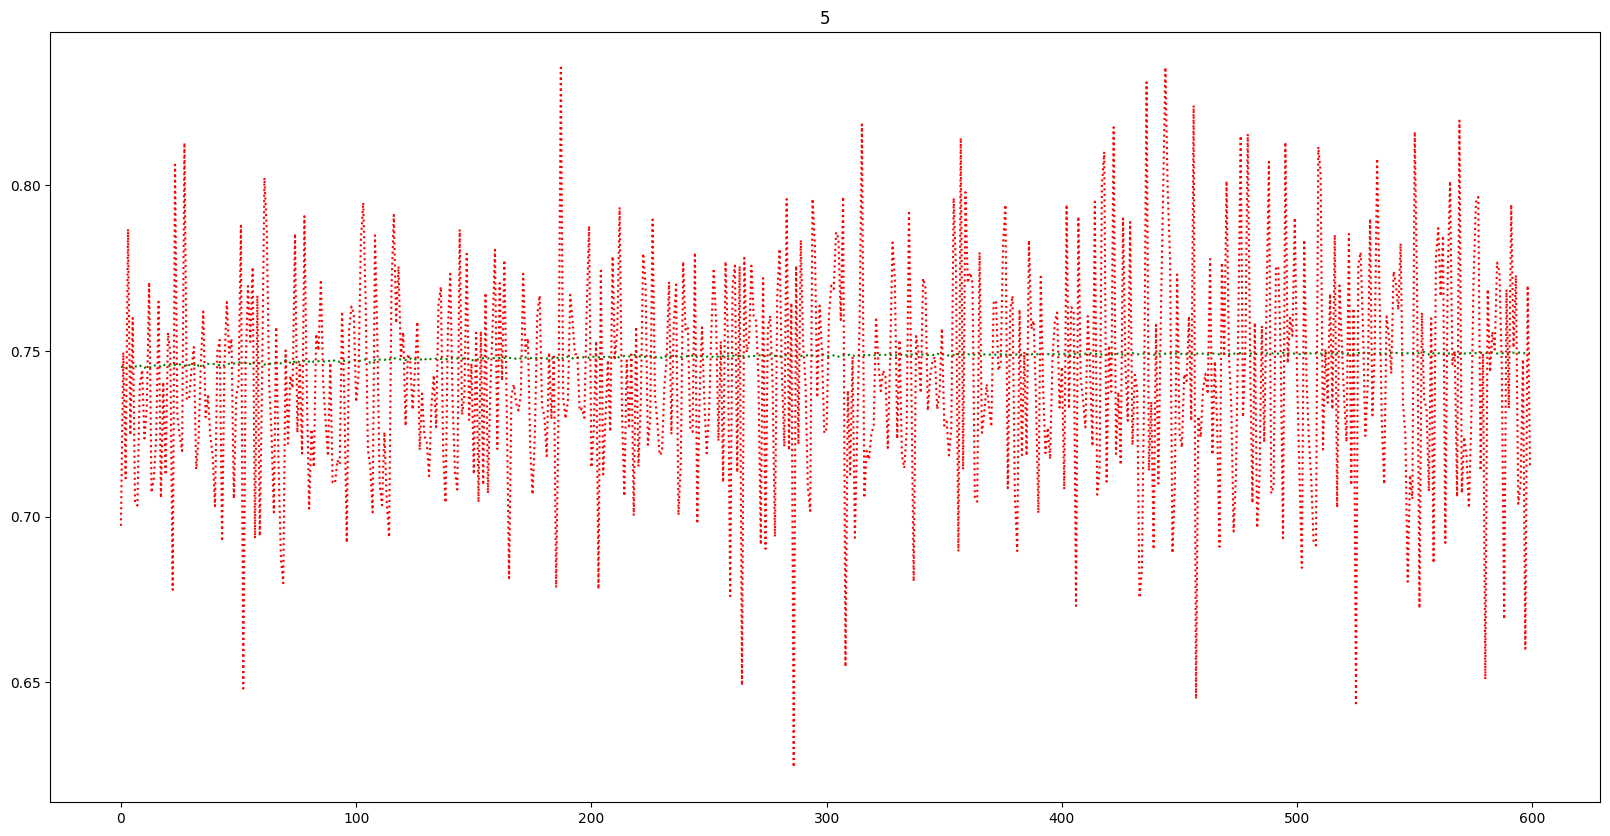

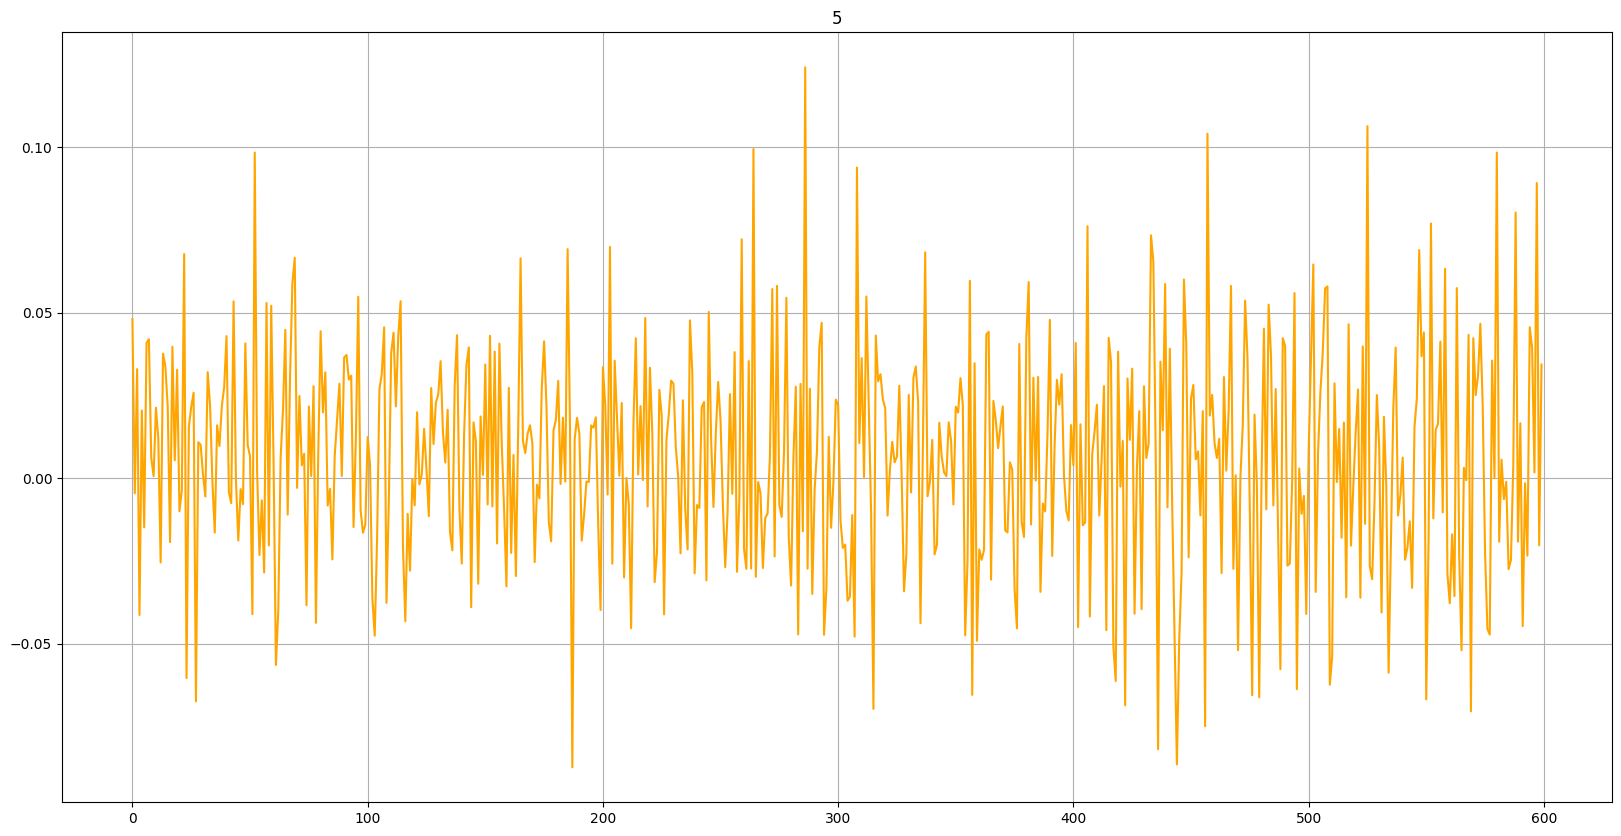

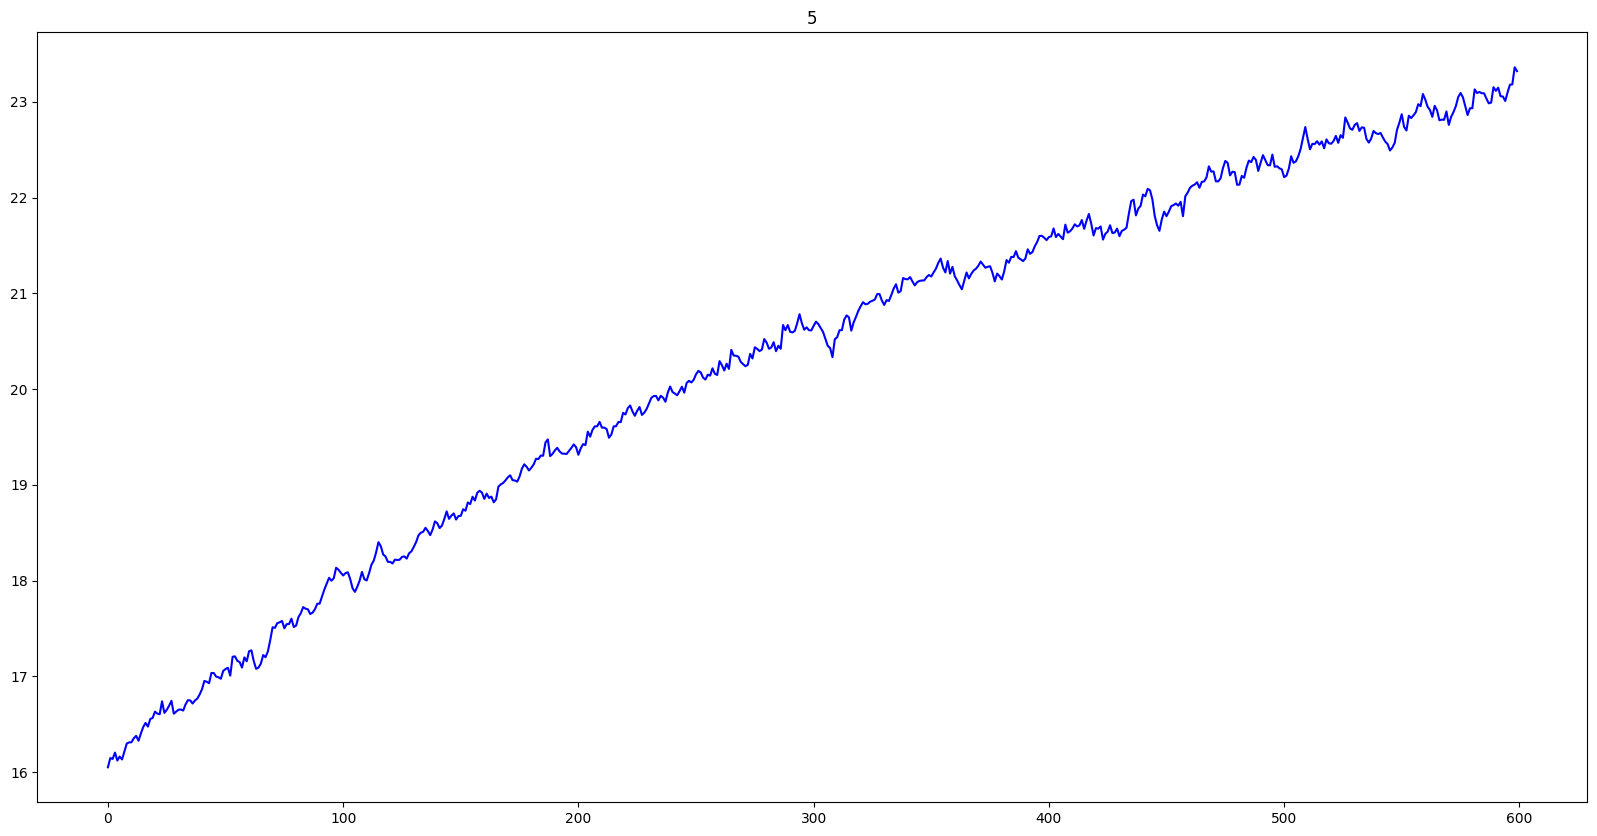

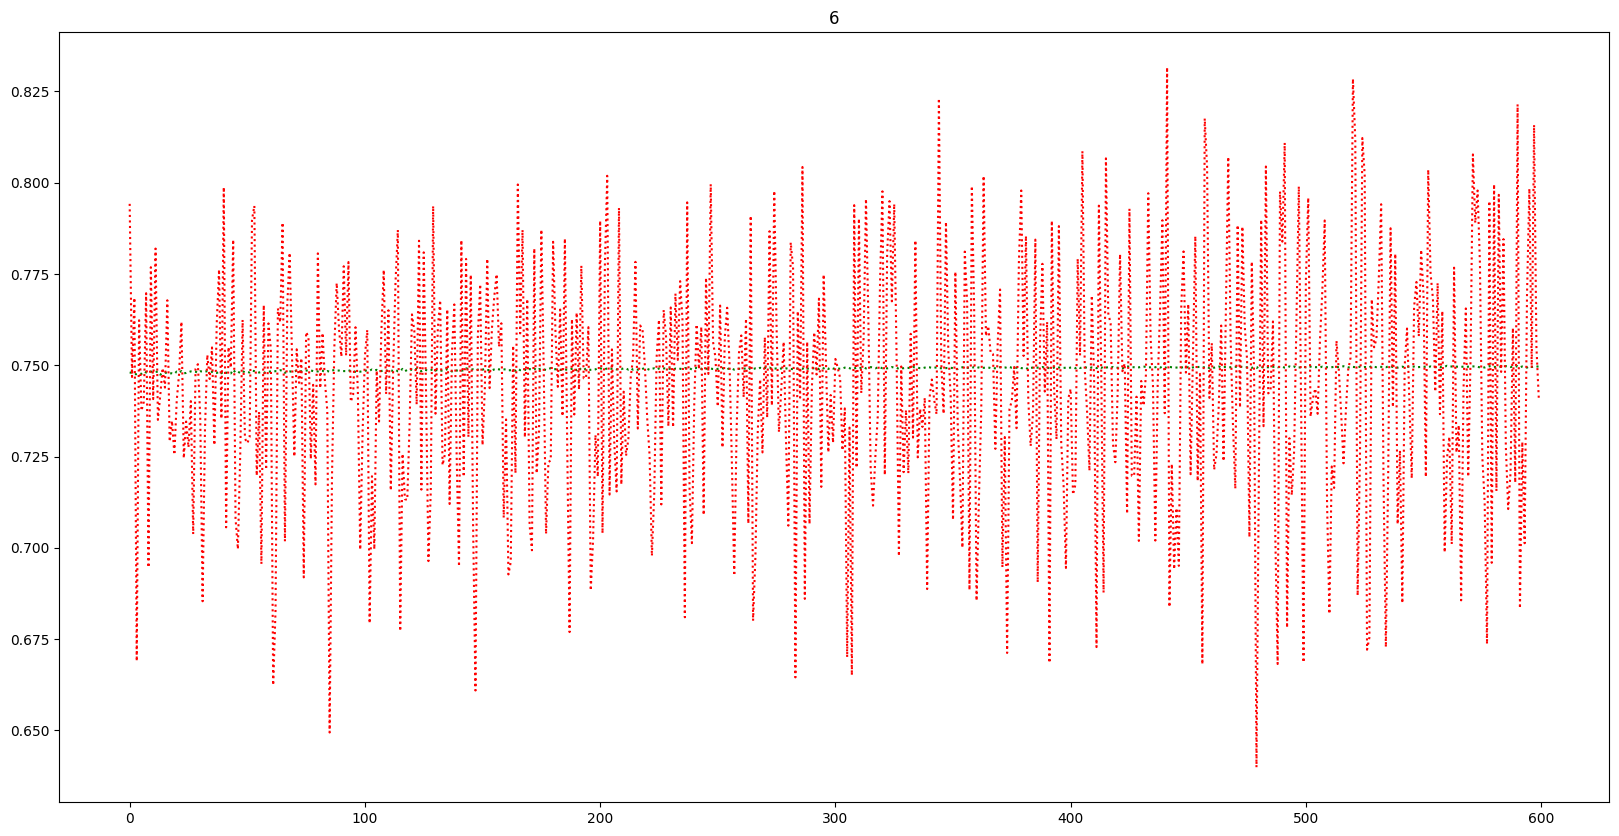

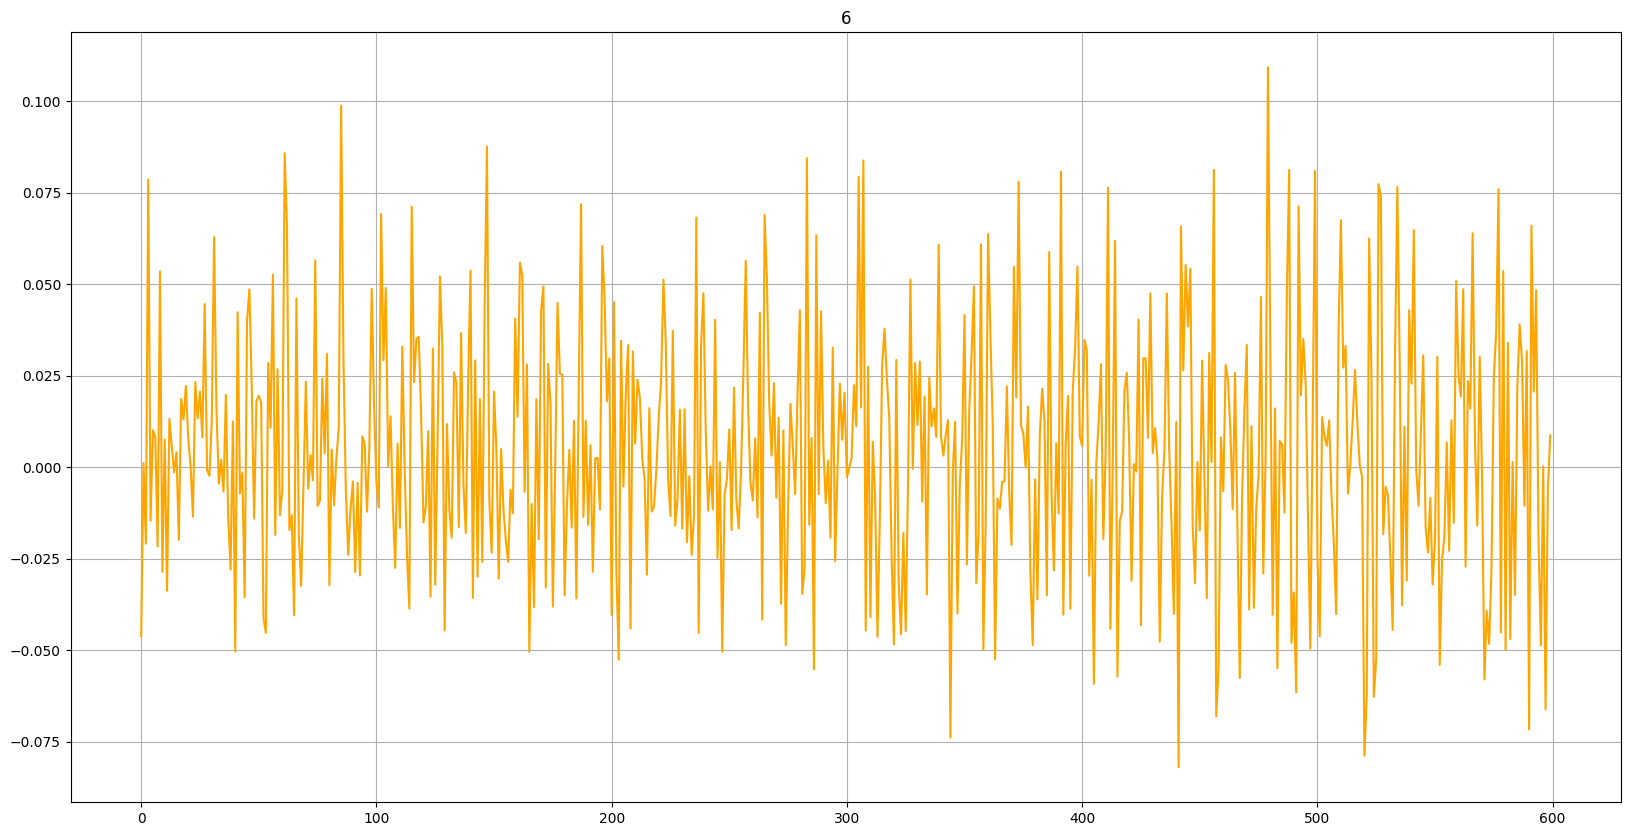

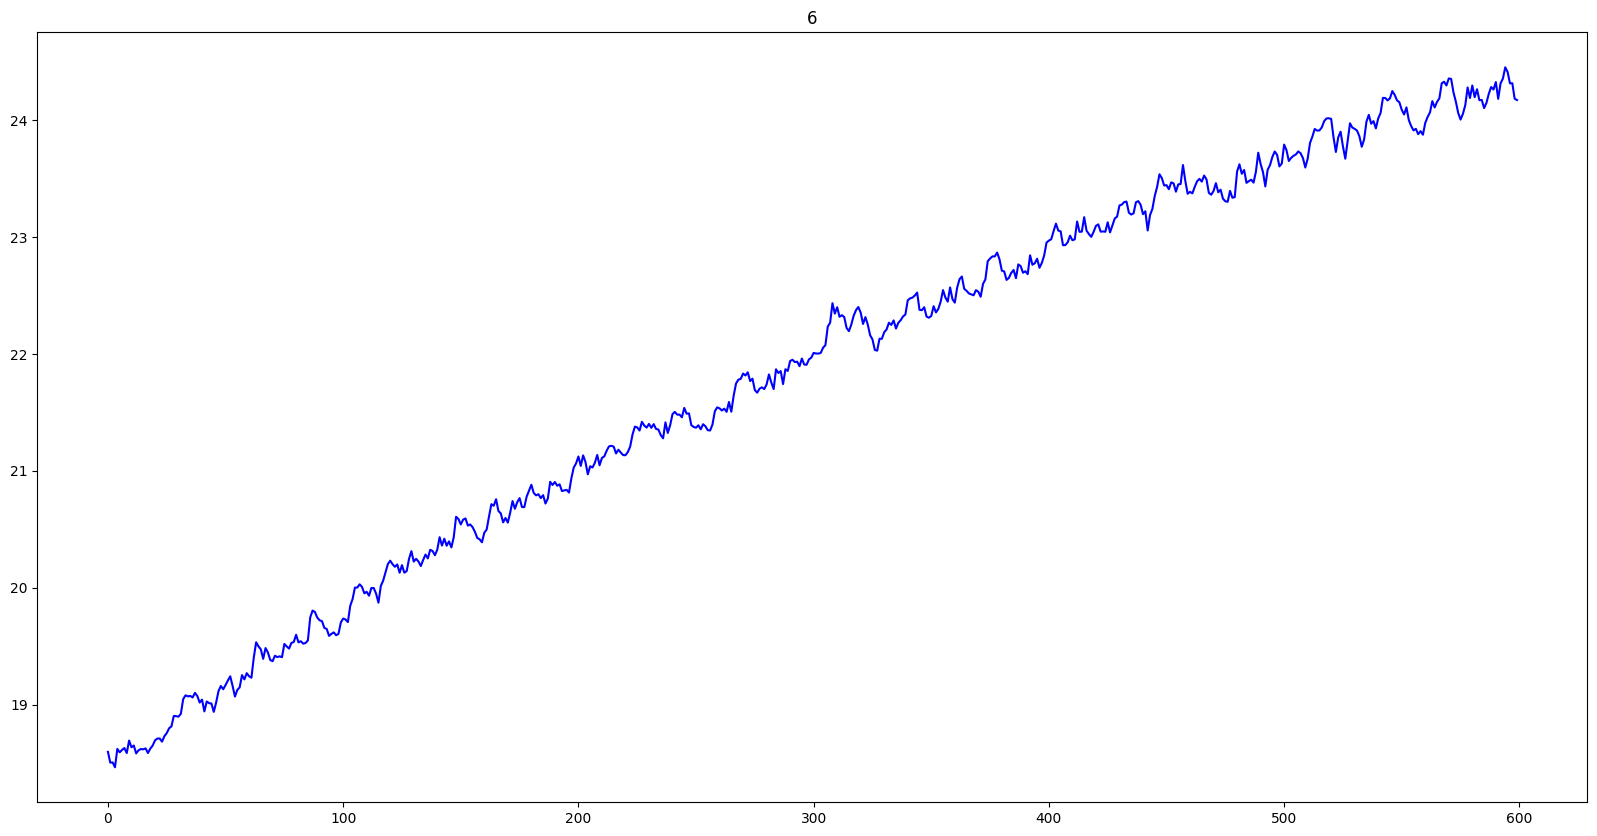

In [10]:
for i in range(series_data4.shape[1]):
    plt.figure(figsize=figsize)
    plt.plot(series_data4[:, i], color='g', linestyle='dotted')
    plt.plot(series_data5[:, i], color='r', linestyle='dotted')
    plt.title(i+1)
    plt.show()

    plt.figure(figsize=figsize)
    plt.plot(series_data45[:, i], color='orange')
    plt.title(i+1)
    plt.grid()
    plt.show()

    plt.figure(figsize=figsize)
    plt.plot(series_data6[:, i], color='b')
    plt.title(i+1)
    plt.show()

In [12]:
plot_series_data(first_grp_concts_idxs, plot_dir=False, plot_p_p_prime=False, plot_W=True)

In [13]:
plot_series_data(sec_grp_concts_idxs, plot_dir=False, plot_p_p_prime=False, plot_W=True)

In [14]:
plot_series_data(first_to_hidd_concts_idxs, plot_dir=False, plot_p_p_prime=False, plot_W=True)

In [15]:
plot_series_data(sec_to_hidd_concts_idxs, plot_dir=False, plot_p_p_prime=False, plot_W=True)

In [16]:
plot_series_data(all_to_bias_concts_idxs, plot_dir=False, plot_p_p_prime=False, plot_W=True)

In [37]:
equi_states1 = np.array([
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1],
])

p = (equi_states1.T@equi_states1)/equi_states1.shape[0]

equi_states2 = np.array([
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1],
    [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1],
    [1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
])

p_prime = (equi_states2.T@equi_states2)/equi_states2.shape[0]

p- p_prime

array([[-0.08333333,  0.        ,  0.        ,  0.        ,  0.08333333,
        -0.16666667,  0.        ,  0.        , -0.08333333, -0.08333333,
        -0.08333333],
       [ 0.        , -0.08333333,  0.        ,  0.        , -0.16666667,
         0.08333333,  0.        ,  0.        , -0.08333333, -0.08333333,
        -0.08333333],
       [ 0.        ,  0.        ,  0.08333333,  0.        ,  0.        ,
         0.        ,  0.08333333,  0.        ,  0.08333333,  0.        ,
         0.08333333],
       [ 0.        ,  0.        ,  0.        ,  0.08333333,  0.        ,
         0.        ,  0.        ,  0.08333333,  0.        ,  0.08333333,
         0.08333333],
       [ 0.08333333, -0.16666667,  0.        ,  0.        , -0.08333333,
         0.        ,  0.        ,  0.        , -0.08333333, -0.08333333,
        -0.08333333],
       [-0.16666667,  0.08333333,  0.        ,  0.        ,  0.        ,
        -0.08333333,  0.        ,  0.        , -0.08333333, -0.08333333,
        -0.083

In [17]:
for i, clamped_debug_list in enumerate(bm.clamped_run_debug):
    for clamped_dist in clamped_debug_list:
       print(clamped_dist['states'][clamped_dist['state_counts'].argmax()][-3:-1], end=', ')

    free_run_dist = bm.free_run_debug[i]
    bm.eval(free_run_dist)

[1. 1.], [0. 0.], [1. 1.], [0. 0.], [68, 69, 70, 71, 136, 137, 138, 139, 272, 273, 274, 275, 544, 545, 546, 547]
[0. 1.], [1. 0.], [0. 0.], [0. 1.], [36, 41, 46, 51, 58, 59, 68, 69, 79, 80, 91, 92, 108, 119, 137, 162]
[0. 1.], [0. 0.], [0. 0.], [0. 1.], [26, 39, 41, 42, 51, 58, 67, 68, 81, 90, 91, 102, 103, 114, 145, 164]
[0. 1.], [0. 0.], [1. 1.], [0. 1.], [12, 36, 40, 46, 54, 55, 63, 64, 70, 77, 81, 87, 115, 150, 153, 249]
[0. 1.], [0. 0.], [0. 1.], [0. 1.], [22, 27, 35, 43, 49, 50, 56, 60, 61, 69, 78, 85, 95, 132, 143, 194]
[1. 0.], [0. 0.], [0. 0.], [1. 1.], [8, 11, 25, 40, 49, 56, 64, 65, 73, 74, 76, 83, 95, 96, 172, 204]
[1. 0.], [0. 0.], [1. 0.], [1. 0.], [11, 22, 27, 39, 48, 59, 60, 63, 70, 71, 78, 79, 82, 87, 150, 214]
[1. 0.], [0. 0.], [1. 0.], [1. 1.], [0, 8, 18, 26, 34, 35, 42, 47, 66, 69, 73, 80, 91, 151, 236, 284]
[1. 0.], [0. 0.], [1. 1.], [1. 1.], [6, 8, 11, 17, 18, 38, 49, 59, 63, 64, 70, 84, 120, 184, 237, 309]
[1. 0.], [0. 0.], [1. 1.], [1. 1.], [0, 8, 9, 10, 17, 28,

In [6]:
def generate_binary_vectors(n):
    """Generate all binary vectors of length n."""
    if n <= 0:
        return []
    
    result = []
    def helper(current_vector, length):
        if length == n:
            result.append(current_vector)
            return
        helper(current_vector + [0], length + 1)
        helper(current_vector + [1], length + 1)
    
    helper([], 0)
    return result

# Example usage
length = 10
vectors = generate_binary_vectors(length)
all_bin_vectors = np.array(vectors)
all_bin_num = all_bin_vectors.shape[0]
ones_col = np.ones((all_bin_num, 1), dtype=int)
all_bin_vectors = np.append(all_bin_vectors, ones_col, axis=1)
all_bin_vectors

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [9]:
gt_dists = []
learn_dists = []
sorted_free_run_states = []
gt_state_energy_progression = []


for i, learn_debug_dict in enumerate(bm.learning_debug):
    bm_ = BoltzmannMachine(env_states, num_hnodes, init_W=learn_debug_dict['W'])
    all_bin_energies = [bm_.calc_energy(vec) for vec in all_bin_vectors]
    gt_state_energy_progression.append(all_bin_energies)

    gt_dist = np.array(sorted(zip(all_bin_energies, np.arange(all_bin_num)),
                     key=lambda x: x[0]))
    
    gt_dists.append(gt_dist)

    free_debug_dict = bm.free_run_debug[i]
    dist = np.array(sorted(zip(free_debug_dict['state_energies'], 
                               np.arange(len(free_debug_dict['state_energies'])),
                               free_debug_dict['state_counts']),
                     key=lambda x: x[0]))
    

    sorted_free_run_states.append(free_debug_dict['states'][dist[:, 1].astype(int)])
    learn_dists.append(dist)
    
    
    # returns the number of top matches, only "top" matches.
    non_matches = gt_dist[:dist.shape[0], 0] != dist[:, 0]
    if non_matches.any():
        num_top_matches = np.nonzero(non_matches)[0][0]
        print(num_top_matches, dist.shape[0], num_top_matches/dist.shape[0])
    else:
        print(dist.shape[0], dist.shape[0])

gt_state_energy_progression = np.array(gt_state_energy_progression)

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages(f'{base_dir}/gt_dist_nnc.pdf') as pdf:
    for i, gt_dist in enumerate(gt_dists[:]):
        
        plt.plot(np.arange(all_bin_num)[:100], gt_dist[:100, 0])
        
        learn_dist = learn_dists[i]
        plt.plot(np.arange(learn_dist.shape[0])[:100], learn_dist[:100, 0], linestyle='dashed') # plot energies
        # plt.plot(np.arange(learn_dist.shape[0]), learn_dist[:, 2], linestyle='dashed') # plot counts
        
        pdf.savefig()  # Save the current figure into the PDF
        plt.close()


with PdfPages(f'{base_dir}/compare_prob_dist_nnc.pdf') as pdf:
    for i, gt_dist in enumerate(gt_dists[:]):
        plt.figure(figsize=(20, 5))

        x = np.arange(all_bin_num)[:100]
        bm_probs = get_boltzmann_distribution(gt_dist[:, 0], bm.equil_time_temp[1])

        plt.plot(x, bm_probs[:100])
        
        learn_dist = learn_dists[i]
        learn_probs = get_probs_from_counts(learn_dist[:, 2])
        learn_probs = np.append(learn_probs, np.zeros(all_bin_num-learn_probs.shape[0]))
        plt.plot(x, learn_probs[:100], linestyle='dashed', linewidth=1)  
        
        pdf.savefig()  # Save the current figure into the PDF
        plt.close()

# fig = make_subplots(rows=len(gt_dists), cols=1)
# for i, gt_dist in enumerate(gt_dists[:]):

#     bm_probs = get_boltzmann_distribution(gt_dist[:, 0], bm.equil_time_temp[1])
#     fig.add_trace(go.Scatter(y=bm_probs,
#                             mode='lines',
#                             marker_color = 'green',
#                             name='gt'),
#                 row=i+1, col=1)
    

#     learn_dist = learn_dists[i]
#     counts = np.append(learn_dist[:, 2], np.ones(all_bin_num-learn_dist.shape[0]))
#     learn_probs = get_probs_from_counts(counts)
#     fig.add_trace(go.Scatter(y=learn_probs,
#                             mode='markers',
#                             name='learn',
#                             marker_color = 'red'),
#                 row=i+1, col=1)

# fig.show()
# fig.write_html("compare_prob_dist_123.html")

322 412 0.7815533980582524
250 369 0.6775067750677507
245 335 0.7313432835820896
198 306 0.6470588235294118
176 278 0.6330935251798561
189 268 0.7052238805970149
161 231 0.696969696969697
136 217 0.6267281105990783
133 203 0.6551724137931034
133 183 0.726775956284153
120 181 0.6629834254143646
120 160 0.75
74 158 0.46835443037974683
92 138 0.6666666666666666
91 138 0.6594202898550725
75 117 0.6410256410256411
64 108 0.5925925925925926
60 113 0.5309734513274337
73 109 0.6697247706422018
58 91 0.6373626373626373
62 87 0.7126436781609196
57 82 0.6951219512195121
58 82 0.7073170731707317
58 77 0.7532467532467533
61 78 0.782051282051282
57 75 0.76
56 72 0.7777777777777778
51 62 0.8225806451612904
58 70 0.8285714285714286
53 68 0.7794117647058824
54 63 0.8571428571428571
52 62 0.8387096774193549
37 53 0.6981132075471698
29 53 0.5471698113207547
29 56 0.5178571428571429
46 58 0.7931034482758621
51 64 0.796875
29 56 0.5178571428571429
24 52 0.46153846153846156
24 61 0.39344262295081966
25 49 0

In [33]:
gt_dists[-1][:10], learn_dists[-1][:10]

(array([[-90.1599625,  69.       ],
        [-89.8369575, 138.       ],
        [-83.83824  , 275.       ],
        [-83.259345 , 531.       ],
        [-83.072435 , 291.       ],
        [-82.49354  , 547.       ],
        [-66.09171  ,  97.       ],
        [-65.91852  , 517.       ],
        [-59.8677525, 146.       ],
        [-59.7621825, 266.       ]]),
 array([[-9.01599625e+01,  3.50000000e+01,  3.69860000e+04],
        [-8.98369575e+01,  6.60000000e+01,  3.36030000e+04],
        [-8.38382400e+01,  1.04000000e+02,  2.14330000e+04],
        [-8.32593450e+01,  1.57000000e+02,  2.13360000e+04],
        [-8.30724350e+01,  1.12000000e+02,  1.82660000e+04],
        [-8.24935400e+01,  1.64000000e+02,  1.74600000e+04],
        [-6.60917100e+01,  5.20000000e+01,  2.36100000e+03],
        [-6.59185200e+01,  1.49000000e+02,  2.94100000e+03],
        [-5.98677525e+01,  7.00000000e+01,  2.01400000e+03],
        [-5.97621825e+01,  9.80000000e+01,  1.42100000e+03]]))

In [22]:
gt_dist[:4, 1]

array([ 4.,  0., 68., 64.])

In [23]:
for gt_dist in gt_dists:
    top_four = all_bin_vectors[gt_dist[:4, 1].astype(int)]

    res_list = []
    for env_state in env_states:
        res = (top_four[:, :-3] == env_state).all(axis=1).any()
        res_list.append(res)
    
    print(gt_dist[:4, 0], sum(res_list))

[-0. -0. -0. -0.] 0
[-2. -2. -0. -0.] 0
[-4. -4. -4. -4.] 0
[-8. -6. -6. -6.] 0
[-8. -8. -8. -8.] 0
[-18. -16. -16. -14.] 1
[-16. -16. -12. -12.] 1
[-16. -14. -14. -10.] 0
[-20. -20. -20. -20.] 0
[-20. -18. -18. -16.] 1
[-20. -20. -16. -16.] 0
[-24. -22. -20. -20.] 0
[-16. -16. -12. -12.] 1
[-6. -6. -6. -6.] 0
[-4. -4. -0. -0.] 0
[-6. -6. -2. -2.] 0
[-8. -8. -8. -8.] 0
[-10. -10.  -8.  -6.] 0
[-20. -20. -16. -12.] 0
[-12. -12. -10. -10.] 0
[-4. -4. -4. -0.] 0
[-12. -12. -12. -10.] 0
[-12.  -8.  -8.  -8.] 1
[-6. -6. -6. -2.] 0
[-4. -0. -0. -0.] 0
[-2. -2. -2. -2.] 1
[-0. -0. -0. -0.] 0
[-2. -2. -2. -2.] 1
[-8. -4. -0. -0.] 1
[-6. -6. -6. -2.] 2
[-0. -0. -0. -0.] 0
[-0.  2.  2.  2.] 0
[-0. -0. -0.  4.] 1
[-2. -0.  2.  2.] 1
[-8. -4. -2. -0.] 1
[-10.  -2.  -2.  -2.] 1
[-16.  -8.  -8.  -4.] 1
[-10.  -4.  -2.  -2.] 1
[-8. -4. -0. -0.] 0
[-2. -0. -0. -0.] 0
[-8. -4. -2. -0.] 1
[-14.  -6.  -2.  -0.] 1
[-16. -12. -10.  -4.] 1
[-10.  -6.  -6.  -2.] 1
[-8. -8. -4. -4.] 2
[-2. -2. -2. -2.] 2
[-8.

In [67]:
#learned W
W = np.array([[  0., -62., -54., -64.,   0.,   0.,   0.,   0.,  24., -48.,   8.],
            [-62.,   0., -60., -62.,   0.,   0.,   0.,   0., -52., -54.,  28.],
            [-54., -60.,   0., -64.,   0.,   0.,   0.,   0., -48.,  32.,   0.],
            [-64., -62., -64.,   0.,   0.,   0.,   0.,   0.,  16.,  16.,  -4.],
            [  0.,   0.,   0.,   0.,   0., -64., -58., -64.,  20., -48.,   4.],
            [  0.,   0.,   0.,   0., -64.,   0., -62., -60., -52., -56.,  28.],
            [  0.,   0.,   0.,   0., -58., -62.,   0., -62., -48.,  24.,   4.],
            [  0.,   0.,   0.,   0., -64., -60., -62.,   0.,  16.,  12.,  -8.],
            [ 24., -52., -48.,  16.,  20., -52., -48.,  16.,   0.,   8.,   0.],
            [-48., -54.,  32.,  16., -48., -56.,  24.,  12.,   8.,   0.,   0.],
            [  8.,  28.,   0.,  -4.,   4.,  28.,   4.,  -8.,   0.,   0.,   0.]])

In [23]:
gen_free_state_dist_pdf(bm, pdf_name=f'{base_dir}/free_run_plots_12.pdf')
print('Done!')
gc.collect()

# gen_clamped_state_dist_pdf(bm, pdf_name=f'{base_dir}/clamped_run_plots_123.pdf')
# print('Done!')
# gc.collect()

# gen_learning_plots_pdf(bm, pdf_name=f'{base_dir}/learning_plots_12.pdf')
# print('Done!')
# gc.collect()

Extra bar! , []
Extra bar! , []
Extra bar! , []
Extra bar! , [12]
Extra bar! , []
[8, 11]
Extra bar! , [11]
Extra bar! , [0, 8]
Extra bar! , [6, 8, 11]
Extra bar! , [0, 8, 9, 10, 15]
Extra bar! , [1, 2, 4, 6]
[0, 1, 4, 6, 10]
Extra bar! , [1, 2, 3, 4, 7]
Extra bar! , [0, 2, 5, 6, 7, 8]
Extra bar! , [1, 2, 3, 4, 6, 15]
[1, 2, 3, 4, 6, 13]
Extra bar! , [1, 2, 3, 4, 5]
[0, 1, 3, 6, 8]
Extra bar! , [0, 1, 3, 4, 7, 9]
[0, 1, 3, 4, 7]
Extra bar! , [0, 1, 3, 4, 9]
Extra bar! , [0, 2, 3, 4, 7, 11]
Extra bar! , [0, 1, 2, 4, 13]
Extra bar! , [0, 1, 2, 3]
Extra bar! , [0, 1, 2, 3, 10]
Extra bar! , [0, 1, 2, 4, 14]
[0, 1, 2, 3, 12]
Extra bar! , [0, 1, 2, 4]
Extra bar! , [0, 1, 2, 3, 10]
Extra bar! , [0, 1, 2, 4]
Extra bar! , [0, 1, 2, 3, 11]
Extra bar! , [0, 1, 2, 3]
Extra bar! , [0, 1, 2, 4, 12]
Extra bar! , [0, 1, 2, 3]
Extra bar! , [0, 1, 2, 3]
Extra bar! , [0, 1, 2, 3]
Extra bar! , [0, 1, 2, 3]
Extra bar! , [0, 1, 2, 3]
Extra bar! , [0, 1, 2, 3]
Extra bar! , [0, 1, 2, 3]
Extra bar! , [0, 1, 2,

480

In [16]:
gc.collect()

30030669

In [122]:
debug_dict = bm.learning_debug[-1]
debug_dict['direction']

array([[ 0.       , -0.00105  ,  0.       , -0.00275  ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.037    , -0.0099125,
         0.04795  ],
       [-0.00105  ,  0.       , -0.0019   , -0.0016   ,  0.       ,
         0.       ,  0.       ,  0.       , -0.0628875, -0.0676375,
        -0.08725  ],
       [ 0.       , -0.0019   ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       , -0.0175875, -0.0261625,
        -0.0285   ],
       [-0.00275  , -0.0016   ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.076    , -0.0062875,
         0.0755   ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       , -0.0036   ,  0.1271   , -0.0109125,
         0.13425  ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       , -0.00055  , -0.00165  , -0.0667875, -0.0680875,
        -0.08955  ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0

In [92]:
a,b = np.unique(bm.energy_change_debug, return_counts=True)

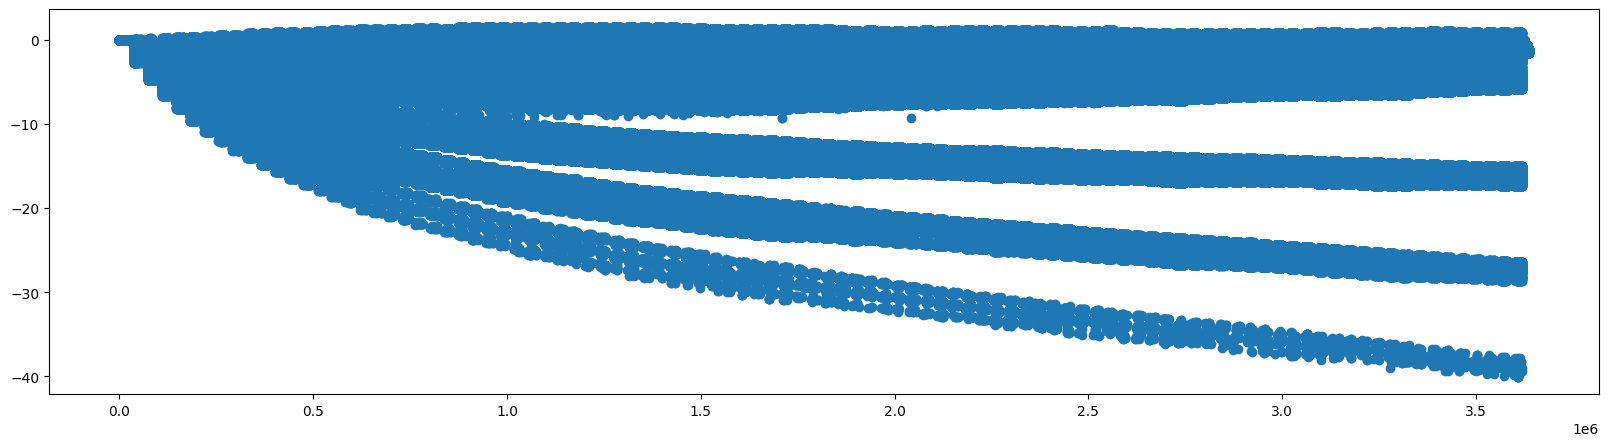

In [103]:
# sorted(a[a>0])
plt.figure(figsize=(20,5))
plt.scatter(np.arange(len(bm.energy_change_debug)), bm.energy_change_debug)

In [104]:
x = np.array(bm.energy_change_debug)
# plt.plot(np.nonzero(x==0)[0])
np.nonzero(x==0)[0]

array([    0,     1,     2, ..., 36357, 36358, 36359], dtype=int64)

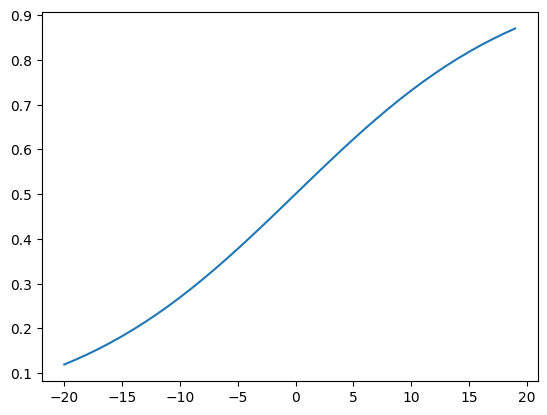

In [88]:
plot_sigmoid(20, 10)

(array([6.220000e+02, 1.045000e+03, 4.319000e+03, 5.663100e+04,
        4.926000e+04, 2.700330e+05, 4.110680e+05, 2.297820e+05,
        6.911420e+05, 1.922098e+06]),
 array([-40.0202  , -35.863505, -31.70681 , -27.550115, -23.39342 ,
        -19.236725, -15.08003 , -10.923335,  -6.76664 ,  -2.609945,
          1.54675 ]),
 <BarContainer object of 10 artists>)

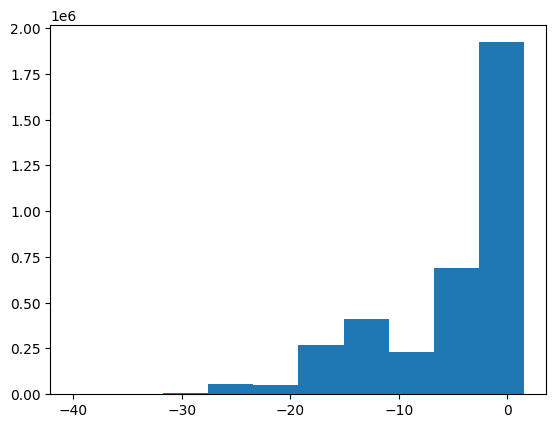

In [85]:
plt.hist(bm.energy_change_debug)

In [78]:
b[77106]

36360

In [61]:
z = np.zeros(0)
z.shape[0]

0

In [29]:
debug_dict = bm.free_run_debug[10]
debug_dict['states'].shape

(45, 11)

In [30]:
debug_dict['state_counts']

array([ 6,  2,  3,  9,  6,  1,  3,  2,  3,  3,  8,  4,  3,  5,  9,  3,  6,
        8,  4,  3,  2,  2,  1,  4,  7, 10,  1,  6, 24,  5,  3,  2,  3,  1,
        1, 10,  1,  2, 10,  5,  2,  1,  1,  3,  2], dtype=int64)

In [31]:
for c,e in zip(debug_dict['state_counts'], debug_dict['state_energies']):
    print(e, '--',c)

-10.0 -- 6
-0.0 -- 2
8.0 -- 3
-6.0 -- 9
-8.0 -- 6
22.0 -- 1
4.0 -- 3
4.0 -- 2
26.0 -- 3
-2.0 -- 3
2.0 -- 8
14.0 -- 4
-2.0 -- 3
6.0 -- 5
4.0 -- 9
4.0 -- 3
2.0 -- 6
-2.0 -- 8
4.0 -- 4
38.0 -- 3
8.0 -- 2
16.0 -- 2
4.0 -- 1
-6.0 -- 4
-6.0 -- 7
4.0 -- 10
12.0 -- 1
-2.0 -- 6
-8.0 -- 24
8.0 -- 5
4.0 -- 3
2.0 -- 2
18.0 -- 3
22.0 -- 1
16.0 -- 1
18.0 -- 10
30.0 -- 1
-10.0 -- 2
8.0 -- 10
14.0 -- 5
-10.0 -- 2
26.0 -- 1
-6.0 -- 1
20.0 -- 3
20.0 -- 2


In [45]:
num_states = debug_dict['states'].shape[0]
# if num_states < 16:
#     new_states = all_states - set(debug_dict['state_labels'])
#     debug_dict['state_labels'].extend(new_states)
#     debug_dict['state_counts'].extend

   
dist = np.array(sorted(zip(debug_dict['state_labels'], 
                           debug_dict['state_counts'], 
                           debug_dict['state_energies'],
                           np.arange(num_states)), 
                    key=lambda x: x[2]))

# keeping only top `maxnum_bars` no. of bars.
top_dist = dist[:14]
low_dist = dist[14:]

In [49]:
min_count_top_dist = top_dist[:, 1].astype(int).min() 
low_dist_counts = low_dist[:, 1].astype(int)
# min_count_top_dist, max_count_low_dist


In [52]:
if min_count_top_dist<low_dist_counts.max():
    max_idx = low_dist_counts.argmax()
    last_bar_data = low_dist[max_idx]
    print(last_bar_data)

['00100010001' '10' '4.0' '25']


In [53]:
top_dist

array([['00000001101', '6', '-10.0', '0'],
       ['10000000101', '2', '-10.0', '37'],
       ['10000100101', '2', '-10.0', '40'],
       ['00000100111', '6', '-8.0', '4'],
       ['00100100111', '24', '-8.0', '28'],
       ['00000100101', '9', '-6.0', '3'],
       ['00100000111', '4', '-6.0', '23'],
       ['00100001101', '7', '-6.0', '24'],
       ['10001000101', '1', '-6.0', '42'],
       ['00001000101', '3', '-2.0', '9'],
       ['00010000101', '3', '-2.0', '12'],
       ['00010100101', '8', '-2.0', '17'],
       ['00100100101', '6', '-2.0', '27'],
       ['00000010001', '2', '-0.0', '1']], dtype='<U32')

In [55]:
np.append(top_dist, [last_bar_data], axis=0)

array([['00000001101', '6', '-10.0', '0'],
       ['10000000101', '2', '-10.0', '37'],
       ['10000100101', '2', '-10.0', '40'],
       ['00000100111', '6', '-8.0', '4'],
       ['00100100111', '24', '-8.0', '28'],
       ['00000100101', '9', '-6.0', '3'],
       ['00100000111', '4', '-6.0', '23'],
       ['00100001101', '7', '-6.0', '24'],
       ['10001000101', '1', '-6.0', '42'],
       ['00001000101', '3', '-2.0', '9'],
       ['00010000101', '3', '-2.0', '12'],
       ['00010100101', '8', '-2.0', '17'],
       ['00100100101', '6', '-2.0', '27'],
       ['00000010001', '2', '-0.0', '1'],
       ['00100010001', '10', '4.0', '25']], dtype='<U32')

In [51]:
low_dist

array([['00001000111', '8', '2.0', '10'],
       ['00010010101', '6', '2.0', '16'],
       ['00101000111', '2', '2.0', '31'],
       ['00000101101', '3', '4.0', '6'],
       ['00000101111', '2', '4.0', '7'],
       ['00010001111', '9', '4.0', '14'],
       ['00010010001', '3', '4.0', '15'],
       ['00010100111', '4', '4.0', '18'],
       ['00100000001', '1', '4.0', '22'],
       ['00100010001', '10', '4.0', '25'],
       ['00100101111', '3', '4.0', '30'],
       ['00010000111', '5', '6.0', '13'],
       ['00000100001', '3', '8.0', '2'],
       ['00010101101', '2', '8.0', '20'],
       ['00100101101', '5', '8.0', '29'],
       ['10000100001', '10', '8.0', '38'],
       ['00100100001', '1', '12.0', '26'],
       ['00001100111', '4', '14.0', '11'],
       ['10000100011', '5', '14.0', '39'],
       ['00010101111', '2', '16.0', '21'],
       ['00110100101', '1', '16.0', '34'],
       ['00110001111', '3', '18.0', '32'],
       ['00110100111', '10', '18.0', '35'],
       ['10100000001', '3',